#Project Title
Employee Salary Prediction in Industry IT Services and IT Consulting Based on Skills With Regression Method

(Prediksi Gaji Karyawan di Industri IT Services and IT Consulting Berdasarkan Keahlian Dengan Metode Regresi)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Memanggil dataset ke dalam project
data = pd.read_csv("./drive/MyDrive/Colab Notebooks/linkedIn_posting/lowongan_kerja.csv")
data

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,Entry level,NaN,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,NaN,NaN,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,NaN,Bachelor's Degree in Mechanical Engineering pr...,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,Entry level,NaN,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,Mid-Senior level,NaN,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-09-23 00:46:40,2023-08-23 22:33:20
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,NaN,4.0,https://www.linkedin.com/jobs/view/108965123/?...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-12-03 19:00:00,2023-11-03 19:33:20
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/102339515/?...,NaN,SimpleOnsiteApply,NaN,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-12-03 21:46:40,2023-11-03 22:20:00
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,1,FULL_TIME,USD,BASE_SALARY,2024-02-18 23:46:40,2023-08-23 00:20:00


##Data Cleaning Lowongan Kerja (data_lowongan)

In [ ]:
# Memanggil dataset ke dalam project
data_lowongan = pd.read_csv("./drive/MyDrive/Colab Notebooks/linkedIn_posting/lowongan_kerja.csv")
data_lowongan

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,Entry level,NaN,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,NaN,NaN,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,NaN,Bachelor's Degree in Mechanical Engineering pr...,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,Entry level,NaN,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,Mid-Senior level,NaN,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-09-23 00:46:40,2023-08-23 22:33:20
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,Full-time,"New York, NY",2.0,NaN,4.0,https://www.linkedin.com/jobs/view/108965123/?...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-12-03 19:00:00,2023-11-03 19:33:20
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,Full-time,Greater Boston,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/102339515/?...,NaN,SimpleOnsiteApply,NaN,NaN,NaN,0,FULL_TIME,NaN,NaN,2023-12-03 21:46:40,2023-11-03 22:20:00
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,NaN,ComplexOnsiteApply,NaN,NaN,NaN,1,FULL_TIME,USD,BASE_SALARY,2024-02-18 23:46:40,2023-08-23 00:20:00


In [ ]:
# menghitung nilai yang hilang di setiap kolom
data_lowongan.isna().sum()

id_pekerjaan                        0
id_perusahaan                     654
judul                               0
deskripsi                           1
gaji_maksimal                   22135
gaji_tengah                     31005
gaji_minimal                    22135
periode_pembayaran              19894
jenis_pekerjaan_terformat           0
lokasi                              0
lamaran                         17008
diperbolehkan_jarak_jauh        28444
tampilan                         7360
url_posting_pekerjaan               0
url_pendaftaran                 12250
tipe_pendaftaran                    0
tingkat_pengalaman_terformat     9181
deskripsi_keterampilan          32909
domain_penyelenggaraan          13558
disponsori                          0
jenis_pekerjaan                     0
mata_uang                       19894
tipe_kompensasi                 19894
waktu_kedaluwarsa                   0
waktu_daftar                        0
dtype: int64

In [ ]:
# Mengisi nilai yang hilang dalam kolom objek dengan 'unknown'
columns_to_fill = ['deskripsi', 'periode_pembayaran', 'url_pendaftaran',
                   'tingkat_pengalaman_terformat', 'deskripsi_keterampilan', 'domain_penyelenggaraan']
data_lowongan[columns_to_fill] = data_lowongan[columns_to_fill].fillna('unknown')

# Hasilnya akan menjadi dataframe 'df' yang telah diisi nilai yang hilang dengan 'unknown'
data_lowongan

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",NaN,NaN,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,Entry level,unknown,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,unknown,Full-time,"Beaver Dam, WI",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757940025/...,https://www.click2apply.net/mXLQz5S5NEYEXsKjwH...,OffsiteApply,unknown,unknown,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,unknown,Full-time,"Bessemer, AL",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/3757938019/...,https://www.click2apply.net/LwbOykH2yAJdahB5Ah...,OffsiteApply,unknown,Bachelor's Degree in Mechanical Engineering pr...,www.click2apply.net,0,FULL_TIME,NaN,NaN,2023-12-04 08:53:20,2023-11-04 06:40:00
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",NaN,NaN,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,NaN,1.0,NaN,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,Mid-Senior level,unknown,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,unknown,Full-time,"Santa Clarita, CA",NaN,NaN,NaN,https://www.linkedin.com/jobs/view/133114754/?...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,FULL_TIME,NaN,NaN,2023-09-23 00:46:40,2023-08-23 22:33:20
33242,108965123,NaN,Office Administrative Assistant,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,unknown,Full-time,"New York, NY",2.0,NaN,4.0,https://www.linkedin.com/jobs/view/108965123/?...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,FULL_TIME,NaN,NaN,2023-12-03 19:00:00,2023-11-03 19:33:20
33243,102339515,52132271.0,Franchise Owner,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,unknown,Full-time,Greater Boston,NaN,NaN,NaN,https://www.linkedin.com/jobs/view/102339515/?...,unknown,SimpleOnsiteApply,unknown,unknown,unknown,0,FULL_TIME,NaN,NaN,2023-12-03 21:46:40,2023-11-03 22:20:00
33244,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",NaN,NaN,5.0,https://www.linkedin.com/jobs/view/85008768/?t...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-02-18 23:46:40,2023-08-23 00:20:00


In [ ]:
# Mendapatkan nilai modus dari kolom yang diinginkan
modus_tipe_kompensasi = data_lowongan['tipe_kompensasi'].mode()[0]

# Mengisi nilai yang hilang dalam kolom 'lokasi' dengan nilai modus
data_lowongan['tipe_kompensasi'].fillna(modus_tipe_kompensasi, inplace=True)

In [ ]:
# Mendapatkan nilai modus dari kolom yang diinginkan
modus_mata_uang = data_lowongan['mata_uang'].mode()[0]

# Mengisi nilai yang hilang dalam kolom 'lokasi' dengan nilai modus
data_lowongan['mata_uang'].fillna(modus_mata_uang, inplace=True)

In [ ]:
# Menghapus baris yang memiliki nilai hilang di kolom 'id_perusahaan'
data_lowongan.dropna(subset=['id_perusahaan'], inplace=True)

In [ ]:
# Mendapatkan nilai modus dari kolom 'diperbolehkan_jarak_jauh'
modus_diperbolehkan_jarak_jauh = data_lowongan['diperbolehkan_jarak_jauh'].mode()[0]

# Mengisi nilai yang hilang dalam kolom 'diperbolehkan_jarak_jauh' dengan nilai modus
data_lowongan['diperbolehkan_jarak_jauh'].fillna(modus_diperbolehkan_jarak_jauh, inplace=True)

In [ ]:
# Mendapatkan nilai modus dari kolom 'tampilan'
modus_tampilan = data_lowongan['tampilan'].mode()[0]

# Mengisi nilai yang hilang dalam kolom 'tampilan' dengan nilai modus
data_lowongan['tampilan'].fillna(modus_tampilan, inplace=True)

In [ ]:
# Mendapatkan nilai modus dari kolom 'lamaran'
modus_lamaran = data_lowongan['lamaran'].mode()[0]

# Mengisi nilai yang hilang dalam kolom 'lamaran' dengan nilai modus
data_lowongan['lamaran'].fillna(modus_lamaran, inplace=True)

In [ ]:
# Menghitung nilai yang hilang di setiap kolom
data_lowongan.isna().sum()

id_pekerjaan                        0
id_perusahaan                       0
judul                               0
deskripsi                           0
gaji_maksimal                   21673
gaji_tengah                     30381
gaji_minimal                    21673
periode_pembayaran                  0
jenis_pekerjaan_terformat           0
lokasi                              0
lamaran                             0
diperbolehkan_jarak_jauh            0
tampilan                            0
url_posting_pekerjaan               0
url_pendaftaran                     0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
deskripsi_keterampilan              0
domain_penyelenggaraan              0
disponsori                          0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
waktu_kedaluwarsa                   0
waktu_daftar                        0
dtype: int64

In [ ]:
data_lowongan.dropna(how='all', subset=['gaji_maksimal', 'gaji_tengah', 'gaji_minimal'], inplace=True)

In [ ]:
# Mengisi nilai gaji_median yang Null dengan (gaji_max + gaji_min) / 2
data_lowongan['gaji_tengah'] = data_lowongan.apply(
    lambda row: (row['gaji_maksimal'] + row['gaji_minimal']) / 2 if pd.isnull(row['gaji_tengah']) else row['gaji_tengah'],
    axis=1
)

# Mengisi nilai gaji_max yang Null dengan gaji_median * 1.1
data_lowongan['gaji_maksimal'] = data_lowongan.apply(
    lambda row: row['gaji_tengah'] * 1.1 if pd.isnull(row['gaji_maksimal']) else row['gaji_maksimal'],
    axis=1
)

# Mengisi nilai gaji_min yang Null dengan gaji_median * 0.9
data_lowongan['gaji_minimal'] = data_lowongan.apply(
    lambda row: row['gaji_tengah'] * 0.9 if pd.isnull(row['gaji_minimal']) else row['gaji_minimal'],
    axis=1
)
data_lowongan

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Full-time,"Little River, SC",1.0,1.0,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,Entry level,unknown,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Full-time,"Aliso Viejo, CA",1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Full-time,United States,1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,Mid-Senior level,unknown,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Full-time,"Aliso Viejo, CA",1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757936097/...,https://jobs.apploi.com/view/861363?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
11,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Full-time,United States,1.0,1.0,130.0,https://www.linkedin.com/jobs/view/3757935381/...,https://escalent.hrmdirect.com/employment/job-...,OffsiteApply,Entry level,unknown,escalent.hrmdirect.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33225,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,Part-time,"Sunrise, FL",1.0,1.0,2.0,https://www.linkedin.com/jobs/view/1638550135/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,PART_TIME,USD,BASE_SALARY,2024-04-30 23:33:20,2023-11-03 00:06:40
33226,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,Full-time,"Savannah, GA",1.0,1.0,14.0,https://www.linkedin.com/jobs/view/1545216695/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-05-02 00:33:20,2023-11-04 01:06:40
33233,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,Part-time,"Muskegon, MI",1.0,1.0,4.0,https://www.linkedin.com/jobs/view/1029078768/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,PART_TIME,USD,BASE_SALARY,2023-09-21 21:00:00,2023-08-22 21:33:20
33236,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,Full-time,"Albany, GA",5.0,1.0,49.0,https://www.linkedin.com/jobs/view/903408693/?...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-02-18 18:13:20,2023-08-22 18:46:40


Case Kalau diantara fields gaji_max-min-med = ketiga fields tersebut gak ada datanya, Solusinya : bisa ngambil data gaji serupa berdasarkan skill, perusahaan & pengalaman kerja (Kalau gak pengen hapus data) **DONE**

Case kalau diantara fields gaji_max-min-med = 1 atau 2 fields gak ada datanya , solusinya :
- bisa ngisi data yang kosong pakai rumus (buat nyari nilai median = (gaji_max + gaji_min) /2 | (buat nyari gaji_min & gaji_max = median * 1.1 & median * 0.9) atau bisa sama ratain aja ngikutin nilai median **DONE**
- ngisi data yang kosong, dengan cara ngambil data gaji serupa berdasarkan skill, perusahaan & pengalaman kerja + sesuakian sama nilai data gaji yang ada (biar gak over rate)

In [ ]:
data_lowongan.isna().sum()

id_pekerjaan                    0
id_perusahaan                   0
judul                           0
deskripsi                       0
gaji_maksimal                   0
gaji_tengah                     0
gaji_minimal                    0
periode_pembayaran              0
jenis_pekerjaan_terformat       0
lokasi                          0
lamaran                         0
diperbolehkan_jarak_jauh        0
tampilan                        0
url_posting_pekerjaan           0
url_pendaftaran                 0
tipe_pendaftaran                0
tingkat_pengalaman_terformat    0
deskripsi_keterampilan          0
domain_penyelenggaraan          0
disponsori                      0
jenis_pekerjaan                 0
mata_uang                       0
tipe_kompensasi                 0
waktu_kedaluwarsa               0
waktu_daftar                    0
dtype: int64

In [ ]:
# Melihat baris yang memiliki data duplikat
duplicate_rows = data_lowongan[data_lowongan.duplicated()]

# Menampilkan baris yang memiliki data duplikat
print(duplicate_rows)

Empty DataFrame
Columns: [id_pekerjaan, id_perusahaan, judul, deskripsi, gaji_maksimal, gaji_tengah, gaji_minimal, periode_pembayaran, jenis_pekerjaan_terformat, lokasi, lamaran, diperbolehkan_jarak_jauh, tampilan, url_posting_pekerjaan, url_pendaftaran, tipe_pendaftaran, tingkat_pengalaman_terformat, deskripsi_keterampilan, domain_penyelenggaraan, disponsori, jenis_pekerjaan, mata_uang, tipe_kompensasi, waktu_kedaluwarsa, waktu_daftar]
Index: []


In [ ]:
target = data_lowongan['jenis_pekerjaan']

# Hitung rasio kelas
class_ratio = target.value_counts() / len(target)

# Hitung rasio keburaman (oversampling)
obscurity_ratio = len(target[target == target.mode()[0]]) / len(target[target != target.mode()[0]])

# Hitung faktor ketidakseimbangan
imbalance_factor = len(target[target == target.mode()[0]]) / len(target[target != target.mode()[0]])

# Hitung Gini impurity
gini_impurity = 1 - sum((class_ratio) ** 2)

# Hitung entropi
entropy = -sum(class_ratio * np.log2(class_ratio))

print("Rasio Kelas:")
print(class_ratio)

print("\nRasio Keburaman (Obscurity Ratio):", obscurity_ratio)

print("\nFaktor Ketidakseimbangan (Imbalance Factor):", imbalance_factor)

print("\nGini Impurity:", gini_impurity)

print("\nEntropi:", entropy)

Rasio Kelas:
jenis_pekerjaan
FULL_TIME     0.838157
CONTRACT      0.098324
PART_TIME     0.046839
TEMPORARY     0.008911
INTERNSHIP    0.004722
OTHER         0.003046
Name: count, dtype: float64

Rasio Keburaman (Obscurity Ratio): 5.178823529411765

Faktor Ketidakseimbangan (Imbalance Factor): 5.178823529411765

Gini Impurity: 0.2855204240911525

Entropi: 0.8719909402666397


In [ ]:
data_lowongan

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Full-time,"Little River, SC",1.0,1.0,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,Entry level,unknown,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Full-time,"Aliso Viejo, CA",1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Full-time,United States,1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,Mid-Senior level,unknown,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Full-time,"Aliso Viejo, CA",1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757936097/...,https://jobs.apploi.com/view/861363?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
11,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Full-time,United States,1.0,1.0,130.0,https://www.linkedin.com/jobs/view/3757935381/...,https://escalent.hrmdirect.com/employment/job-...,OffsiteApply,Entry level,unknown,escalent.hrmdirect.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33225,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,Part-time,"Sunrise, FL",1.0,1.0,2.0,https://www.linkedin.com/jobs/view/1638550135/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,PART_TIME,USD,BASE_SALARY,2024-04-30 23:33:20,2023-11-03 00:06:40
33226,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,Full-time,"Savannah, GA",1.0,1.0,14.0,https://www.linkedin.com/jobs/view/1545216695/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-05-02 00:33:20,2023-11-04 01:06:40
33233,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,Part-time,"Muskegon, MI",1.0,1.0,4.0,https://www.linkedin.com/jobs/view/1029078768/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,PART_TIME,USD,BASE_SALARY,2023-09-21 21:00:00,2023-08-22 21:33:20
33236,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,Full-time,"Albany, GA",5.0,1.0,49.0,https://www.linkedin.com/jobs/view/903408693/?...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-02-18 18:13:20,2023-08-22 18:46:40


## Data Cleaning Skill Pekerjaan (data_skill)

In [ ]:
# Memanggil dataset kedalam projek
data_skill = pd.read_csv("./drive/MyDrive/Colab Notebooks/linkedIn_posting/detail_pekerjaan/skill_pekerjaan.csv")
data_skill

,id_pekerjaan,singkatan_kemampuan
0,3690843087,ACCT
1,3690843087,FIN
2,3691763971,MGMT
3,3691763971,MNFC
4,3691775263,MGMT
...,...,...
56586,3757780487,HCPR
56587,3757934256,DSGN
56588,3757934256,ART
56589,3757934256,IT


In [ ]:
# Mengidentifikasi nilai yang hilang
missing_values = data_skill.isna()

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
print(missing_values)

       id_pekerjaan  singkatan_kemampuan
0             False                False
1             False                False
2             False                False
3             False                False
4             False                False
...             ...                  ...
56586         False                False
56587         False                False
56588         False                False
56589         False                False
56590         False                False

[56591 rows x 2 columns]


In [ ]:
# Menghitung nilai yang hilang di setiap kolom
data_skill.isna().sum()

id_pekerjaan           0
singkatan_kemampuan    0
dtype: int64

In [ ]:
data_skill.id_pekerjaan.duplicated().sum()

24169

In [ ]:
data_skill.drop_duplicates(subset=['id_pekerjaan'], inplace=True)
data_skill.id_pekerjaan.duplicated().sum()

0

In [ ]:
# Melihat baris yang memiliki data duplikat
duplicate_rows = data_skill[data_skill.duplicated()]

# Menampilkan baris yang memiliki data duplikat
print(duplicate_rows)

Empty DataFrame
Columns: [id_pekerjaan, singkatan_kemampuan]
Index: []


In [ ]:
target = data_skill['id_pekerjaan']

# Hitung rasio kelas
class_ratio = target.value_counts() / len(target)

# Hitung rasio keburaman (oversampling)
obscurity_ratio = len(target[target == target.mode()[0]]) / len(target[target != target.mode()[0]])

# Hitung faktor ketidakseimbangan
imbalance_factor = len(target[target == target.mode()[0]]) / len(target[target != target.mode()[0]])

# Hitung Gini impurity
gini_impurity = 1 - sum((class_ratio) ** 2)

# Hitung entropi
entropy = -sum(class_ratio * np.log2(class_ratio))

print("Rasio Kelas:")
print(class_ratio)

print("\nRasio Keburaman (Obscurity Ratio):", obscurity_ratio)

print("\nFaktor Ketidakseimbangan (Imbalance Factor):", imbalance_factor)

print("\nGini Impurity:", gini_impurity)

print("\nEntropi:", entropy)

Rasio Kelas:
id_pekerjaan
3690843087    0.000031
3757458779    0.000031
3757454347    0.000031
3757729571    0.000031
3757491568    0.000031
                ...   
3699084351    0.000031
3699084342    0.000031
3699084332    0.000031
3699084330    0.000031
3757498232    0.000031
Name: count, Length: 32422, dtype: float64

Rasio Keburaman (Obscurity Ratio): 3.0844205915918693e-05

Faktor Ketidakseimbangan (Imbalance Factor): 3.0844205915918693e-05

Gini Impurity: 0.9999691567454198

Entropi: 14.984685467967303


In [ ]:
data_skill

,id_pekerjaan,singkatan_kemampuan
0,3690843087,ACCT
2,3691763971,MGMT
4,3691775263,MGMT
6,3691786992,HCPR
7,3691789797,MGMT
...,...,...
56583,3757720281,OTHR
56584,3757486249,CNSL
56586,3757780487,HCPR
56587,3757934256,DSGN


##Data Cleaning Kemampuan (data_kemampuan)

In [ ]:
# Memanggil dataset kedalam projek
data_kemampuan = pd.read_csv("./drive/MyDrive/Colab Notebooks/linkedIn_posting/mapping/kemampuan.csv")
data_kemampuan

,singkatan_kemampuan,nama_kemampuan
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning
5,WRT,Writing/Editing
6,QA,Quality Assurance
7,DIST,Distribution
8,PROD,Production
9,PRJM,Project Management


In [ ]:
# Mengidentifikasi nilai yang hilang
missing_values = data_kemampuan.isna()

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
print(missing_values)

    singkatan_kemampuan  nama_kemampuan
0                 False           False
1                 False           False
2                 False           False
3                 False           False
4                 False           False
5                 False           False
6                 False           False
7                 False           False
8                 False           False
9                 False           False
10                False           False
11                False           False
12                False           False
13                False           False
14                False           False
15                False           False
16                False           False
17                False           False
18                False           False
19                False           False
20                False           False
21                False           False
22                False           False
23                False           False


In [ ]:
# Menghitung nilai yang hilang di setiap kolom
data_kemampuan.isna().sum()

singkatan_kemampuan    0
nama_kemampuan         0
dtype: int64

In [ ]:
data_kemampuan.duplicated().sum()

0

In [ ]:
# Melihat baris yang memiliki data duplikat
duplicate_rows = data_kemampuan[data_kemampuan.duplicated()]

# Menampilkan baris yang memiliki data duplikat
print(duplicate_rows)

Empty DataFrame
Columns: [singkatan_kemampuan, nama_kemampuan]
Index: []


In [ ]:
target = data_kemampuan['nama_kemampuan']

# Hitung rasio kelas
class_ratio = target.value_counts() / len(target)

# Hitung rasio keburaman (oversampling)
obscurity_ratio = len(target[target == target.mode()[0]]) / len(target[target != target.mode()[0]])

# Hitung faktor ketidakseimbangan
imbalance_factor = len(target[target == target.mode()[0]]) / len(target[target != target.mode()[0]])

# Hitung Gini impurity
gini_impurity = 1 - sum((class_ratio) ** 2)

# Hitung entropi
entropy = -sum(class_ratio * np.log2(class_ratio))

print("Rasio Kelas:")
print(class_ratio)
print("\nRasio Keburaman (Obscurity Ratio):", obscurity_ratio)
print("\nFaktor Ketidakseimbangan (Imbalance Factor):", imbalance_factor)
print("\nGini Impurity:", gini_impurity)
print("\nEntropi:", entropy)

Rasio Kelas:
nama_kemampuan
Purchasing                0.028571
Engineering               0.028571
Sales                     0.028571
Business Development      0.028571
Management                0.028571
Manufacturing             0.028571
General Business          0.028571
Customer Service          0.028571
Other                     0.028571
Analyst                   0.028571
Consulting                0.028571
Accounting/Auditing       0.028571
Health Care Provider      0.028571
Design                    0.028571
Art/Creative              0.028571
Information Technology    0.028571
Finance                   0.028571
Training                  0.028571
Supply Chain              0.028571
Production                0.028571
Public Relations          0.028571
Science                   0.028571
Strategy/Planning         0.028571
Writing/Editing           0.028571
Quality Assurance         0.028571
Distribution              0.028571
Project Management        0.028571
Education                 0

In [ ]:
data_kemampuan

,singkatan_kemampuan,nama_kemampuan
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning
5,WRT,Writing/Editing
6,QA,Quality Assurance
7,DIST,Distribution
8,PROD,Production
9,PRJM,Project Management


##Data Cleaning Upah (df_upah)

In [ ]:
# Memanggil dataset kedalam projek
df_upah = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/linkedIn_posting/detail_pekerjaan/upah.csv")
df_upah

,id_gaji,id_pekerjaan,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,mata_uang,jenis_kompensasi
0,1,3378133231,30.0,NaN,22.0,HOURLY,USD,BASE_SALARY
1,2,3690843087,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY
2,3,3691794313,22.0,NaN,19.0,HOURLY,USD,BASE_SALARY
3,4,3691795389,70000.0,NaN,68000.0,YEARLY,USD,BASE_SALARY
4,5,3691797089,22.0,NaN,18.0,HOURLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...
13347,13736,3756116147,210000.0,NaN,170000.0,YEARLY,USD,BASE_SALARY
13348,13737,3757723474,130000.0,NaN,110000.0,YEARLY,USD,BASE_SALARY
13349,13738,3757485745,NaN,48.0,NaN,HOURLY,USD,BASE_SALARY
13350,13739,3757490898,60000.0,NaN,45000.0,YEARLY,USD,BASE_SALARY


In [ ]:
# Mendeteksi missing Vallue
df_upah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13352 entries, 0 to 13351
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_gaji             13352 non-null  int64  
 1   id_pekerjaan        13352 non-null  int64  
 2   gaji_maksimal       11111 non-null  float64
 3   gaji_median         2241 non-null   float64
 4   gaji_minimal        11111 non-null  float64
 5   periode_pembayaran  13352 non-null  object 
 6   mata_uang           13352 non-null  object 
 7   jenis_kompensasi    13352 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 834.6+ KB


In [ ]:
missing_values = df_upah.isna().sum()
missing_values

id_gaji                   0
id_pekerjaan              0
gaji_maksimal          2241
gaji_median           11111
gaji_minimal           2241
periode_pembayaran        0
mata_uang                 0
jenis_kompensasi          0
dtype: int64

In [ ]:
# Mengisi nilai yang hilang dengan menyimpan hasilnya kembali ke DataFrame
df_upah = df_upah.copy()  # pastikan memiliki DataFrame salinan jika diperlukan

df_upah['gaji_maksimal'] = df_upah['gaji_maksimal'].fillna(df_upah['gaji_maksimal'].mode())
df_upah['gaji_median'] = df_upah['gaji_median'].fillna(df_upah['gaji_median'].mode())
df_upah['gaji_minimal'] = df_upah['gaji_minimal'].fillna(df_upah['gaji_minimal'].mode())

In [ ]:
missing_values = df_upah.isna().sum()
missing_values

id_gaji                   0
id_pekerjaan              0
gaji_maksimal          2241
gaji_median           11110
gaji_minimal           2241
periode_pembayaran        0
mata_uang                 0
jenis_kompensasi          0
dtype: int64

In [ ]:
# Menghapus baris yang memiliki nilai kosong diketiga kolom gaji
df_upah.dropna(how='all', subset=['gaji_maksimal', 'gaji_median', 'gaji_minimal'], inplace=True)

In [ ]:
# Mengisi nilai gaji_median yang Null dengan (gaji_max + gaji_min) / 2
df_upah['gaji_median'] = df_upah.apply(
    lambda row: (row['gaji_maksimal'] + row['gaji_minimal']) / 2 if pd.isnull(row['gaji_median']) else row['gaji_median'],
    axis=1
)

# Mengisi nilai gaji_max yang Null dengan gaji_median * 1.1
df_upah['gaji_maksimal'] = df_upah.apply(
    lambda row: row['gaji_median'] * 1.1 if pd.isnull(row['gaji_maksimal']) else row['gaji_maksimal'],
    axis=1
)

# Mengisi nilai gaji_min yang Null dengan gaji_median * 0.9
df_upah['gaji_minimal'] = df_upah.apply(
    lambda row: row['gaji_median'] * 0.9 if pd.isnull(row['gaji_minimal']) else row['gaji_minimal'],
    axis=1
)
df_upah

,id_gaji,id_pekerjaan,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,mata_uang,jenis_kompensasi
0,1,3378133231,30.0,20.0,22.0,HOURLY,USD,BASE_SALARY
1,2,3690843087,65000.0,60000.0,55000.0,YEARLY,USD,BASE_SALARY
2,3,3691794313,22.0,20.5,19.0,HOURLY,USD,BASE_SALARY
3,4,3691795389,70000.0,69000.0,68000.0,YEARLY,USD,BASE_SALARY
4,5,3691797089,22.0,20.0,18.0,HOURLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...
13347,13736,3756116147,210000.0,190000.0,170000.0,YEARLY,USD,BASE_SALARY
13348,13737,3757723474,130000.0,120000.0,110000.0,YEARLY,USD,BASE_SALARY
13349,13738,3757485745,52.8,48.0,43.2,HOURLY,USD,BASE_SALARY
13350,13739,3757490898,60000.0,52500.0,45000.0,YEARLY,USD,BASE_SALARY


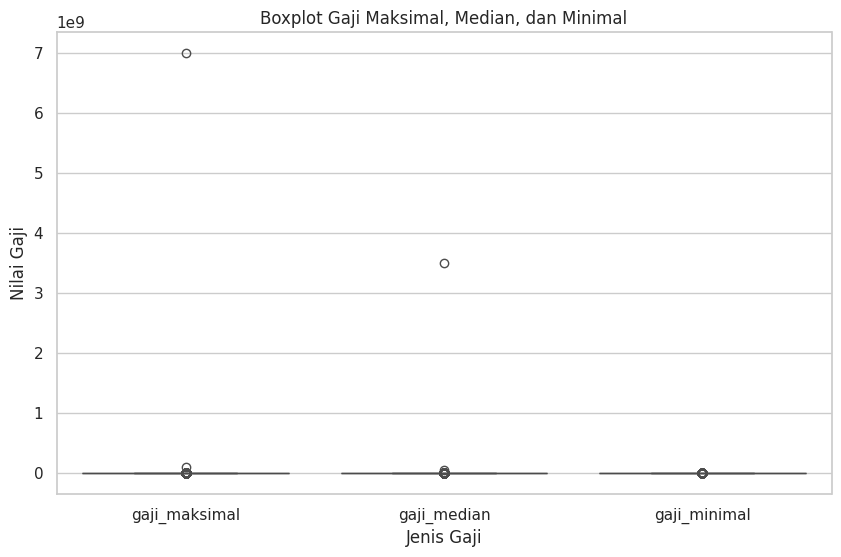

In [ ]:
# Asumsikan df_upah sudah ada dan memiliki kolom gaji_maksimal, gaji_median, gaji_minimal
# Buat plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_upah[['gaji_maksimal', 'gaji_median', 'gaji_minimal']])

# Tambahkan judul dan label sumbu
plt.title("Boxplot Gaji Maksimal, Median, dan Minimal")
plt.xlabel("Jenis Gaji")
plt.ylabel("Nilai Gaji")

# Tampilkan plot
plt.show()

In [ ]:
# Menghitung berapa baris yg duplicate
duplicate_rows = df_upah.duplicated().sum()
print(duplicate_rows)

# Melihat isi data yg duplicate
duplicate_rows = df_upah[df_upah.duplicated()]
duplicate_rows.head(10)

0


,id_gaji,id_pekerjaan,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,mata_uang,jenis_kompensasi


In [ ]:
df_upah

,id_gaji,id_pekerjaan,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,mata_uang,jenis_kompensasi
0,1,3378133231,30.0,20.0,22.0,HOURLY,USD,BASE_SALARY
1,2,3690843087,65000.0,60000.0,55000.0,YEARLY,USD,BASE_SALARY
2,3,3691794313,22.0,20.5,19.0,HOURLY,USD,BASE_SALARY
3,4,3691795389,70000.0,69000.0,68000.0,YEARLY,USD,BASE_SALARY
4,5,3691797089,22.0,20.0,18.0,HOURLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...
13347,13736,3756116147,210000.0,190000.0,170000.0,YEARLY,USD,BASE_SALARY
13348,13737,3757723474,130000.0,120000.0,110000.0,YEARLY,USD,BASE_SALARY
13349,13738,3757485745,52.8,48.0,43.2,HOURLY,USD,BASE_SALARY
13350,13739,3757490898,60000.0,52500.0,45000.0,YEARLY,USD,BASE_SALARY


## Data Cleaning Industri

In [ ]:
# Memanggil dataset kedalam projek
industri = pd.read_csv("/content/drive/My Drive/Buat Ngerjain Featured Engineering/industri.csv")
industri

,id_industri,nama_industri
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"
...,...,...
224,3240,Renewable Energy Power Generation
225,3241,Renewable Energy Equipment Manufacturing
226,3242,Engineering Services
227,3243,Services for Renewable Energy


In [ ]:
# Memeriksa missing Vallue
industri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_industri    229 non-null    int64 
 1   nama_industri  212 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
industri.isna().sum()

id_industri       0
nama_industri    17
dtype: int64

In [ ]:
industri['nama_industri'].fillna('Unknown',inplace=True)

In [ ]:
industri.isna().sum()

id_industri      0
nama_industri    0
dtype: int64

In [ ]:
# Menghitung berapa baris yg duplicate
duplicate = industri.id_industri.duplicated().sum()
print(duplicate)

0


In [ ]:
industri.drop_duplicates(subset=['id_industri'], inplace=True)
industri.id_industri.duplicated().sum()

0

In [ ]:
industri

,id_industri,nama_industri
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"
...,...,...
224,3240,Renewable Energy Power Generation
225,3241,Renewable Energy Equipment Manufacturing
226,3242,Engineering Services
227,3243,Services for Renewable Energy


## Pendefinisian ulang dataset

In [ ]:
# Dataset lowongan_kerja.csv
df_lk = data_lowongan
df_lk

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Full-time,"Little River, SC",1.0,1.0,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,Entry level,unknown,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Full-time,"Aliso Viejo, CA",1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Full-time,United States,1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,Mid-Senior level,unknown,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Full-time,"Aliso Viejo, CA",1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757936097/...,https://jobs.apploi.com/view/861363?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
11,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Full-time,United States,1.0,1.0,130.0,https://www.linkedin.com/jobs/view/3757935381/...,https://escalent.hrmdirect.com/employment/job-...,OffsiteApply,Entry level,unknown,escalent.hrmdirect.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33225,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,Part-time,"Sunrise, FL",1.0,1.0,2.0,https://www.linkedin.com/jobs/view/1638550135/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,PART_TIME,USD,BASE_SALARY,2024-04-30 23:33:20,2023-11-03 00:06:40
33226,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,Full-time,"Savannah, GA",1.0,1.0,14.0,https://www.linkedin.com/jobs/view/1545216695/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-05-02 00:33:20,2023-11-04 01:06:40
33233,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,Part-time,"Muskegon, MI",1.0,1.0,4.0,https://www.linkedin.com/jobs/view/1029078768/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,PART_TIME,USD,BASE_SALARY,2023-09-21 21:00:00,2023-08-22 21:33:20
33236,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,Full-time,"Albany, GA",5.0,1.0,49.0,https://www.linkedin.com/jobs/view/903408693/?...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-02-18 18:13:20,2023-08-22 18:46:40


In [ ]:
# Dataset skill_pekerjaan.csv
df_skill_pekerjaan = data_skill
df_skill_pekerjaan

,id_pekerjaan,singkatan_kemampuan
0,3690843087,ACCT
2,3691763971,MGMT
4,3691775263,MGMT
6,3691786992,HCPR
7,3691789797,MGMT
...,...,...
56583,3757720281,OTHR
56584,3757486249,CNSL
56586,3757780487,HCPR
56587,3757934256,DSGN


In [ ]:
df_industri_pekerjaan = pd.read_csv('/content/drive/My Drive/Buat Ngerjain Featured Engineering/industri_pekerjaan.csv')
df_industri_pekerjaan

,id_pekerjaan,id_industri
0,3378133231,68
1,3497509795,96
2,3690843087,47
3,3691775263,112
4,3691779379,80
...,...,...
44086,3757486249,47
44087,3757486249,43
44088,3757780487,104
44089,3757934256,80


In [ ]:
# Dataset industri.csv
df_industri = industri
df_industri

,id_industri,nama_industri
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"
...,...,...
224,3240,Renewable Energy Power Generation
225,3241,Renewable Energy Equipment Manufacturing
226,3242,Engineering Services
227,3243,Services for Renewable Energy


In [ ]:
# Memuat dataset kemampuan
df_kemampuan = data_kemampuan
df_kemampuan

,singkatan_kemampuan,nama_kemampuan
0,PRCH,Purchasing
1,SUPL,Supply Chain
2,PR,Public Relations
3,SCI,Science
4,STRA,Strategy/Planning
5,WRT,Writing/Editing
6,QA,Quality Assurance
7,DIST,Distribution
8,PROD,Production
9,PRJM,Project Management


In [ ]:
# Dataset perusahaan.csv
df_perusahaan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/linkedIn_posting/detail_perusahaan/perusahaan.csv') #'/content/drive/My Drive/Buat Ngerjain Featured Engineering/perusahaan.csv'
df_perusahaan

,id_perusahaan,nama,deskripsi,ukuran_perusahaan,negara_bagian,negara,kota,kode_pos,alamat,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
...,...,...,...,...,...,...,...,...,...,...
11356,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo
11357,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan
11358,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources
11359,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group


In [ ]:
# Dataset upah.csv
df_gaji = df_upah
df_gaji

,id_gaji,id_pekerjaan,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,mata_uang,jenis_kompensasi
0,1,3378133231,30.0,20.0,22.0,HOURLY,USD,BASE_SALARY
1,2,3690843087,65000.0,60000.0,55000.0,YEARLY,USD,BASE_SALARY
2,3,3691794313,22.0,20.5,19.0,HOURLY,USD,BASE_SALARY
3,4,3691795389,70000.0,69000.0,68000.0,YEARLY,USD,BASE_SALARY
4,5,3691797089,22.0,20.0,18.0,HOURLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...
13347,13736,3756116147,210000.0,190000.0,170000.0,YEARLY,USD,BASE_SALARY
13348,13737,3757723474,130000.0,120000.0,110000.0,YEARLY,USD,BASE_SALARY
13349,13738,3757485745,52.8,48.0,43.2,HOURLY,USD,BASE_SALARY
13350,13739,3757490898,60000.0,52500.0,45000.0,YEARLY,USD,BASE_SALARY


## Feature Extraction
Seleksi kolom dataset

### lowongan_kerja (df_lk_clean)

In [ ]:
df_lk

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lokasi,lamaran,diperbolehkan_jarak_jauh,tampilan,url_posting_pekerjaan,url_pendaftaran,tipe_pendaftaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,domain_penyelenggaraan,disponsori,jenis_pekerjaan,mata_uang,tipe_kompensasi,waktu_kedaluwarsa,waktu_daftar
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Full-time,"Little River, SC",1.0,1.0,9.0,https://www.linkedin.com/jobs/view/3757940104/...,https://careers-demant.icims.com/jobs/19601/he...,OffsiteApply,Entry level,unknown,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Full-time,"Aliso Viejo, CA",1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757938018/...,https://jobs.apploi.com/view/854782?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Full-time,United States,1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757937095/...,https://careers.iherb.com/global/en/job/IHINGL...,OffsiteApply,Mid-Senior level,unknown,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Full-time,"Aliso Viejo, CA",1.0,1.0,1.0,https://www.linkedin.com/jobs/view/3757936097/...,https://jobs.apploi.com/view/861363?utm_campai...,OffsiteApply,Entry level,unknown,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 06:40:00
11,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Full-time,United States,1.0,1.0,130.0,https://www.linkedin.com/jobs/view/3757935381/...,https://escalent.hrmdirect.com/employment/job-...,OffsiteApply,Entry level,unknown,escalent.hrmdirect.com,0,FULL_TIME,USD,BASE_SALARY,2023-12-04 08:53:20,2023-11-04 09:26:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33225,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,Part-time,"Sunrise, FL",1.0,1.0,2.0,https://www.linkedin.com/jobs/view/1638550135/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,PART_TIME,USD,BASE_SALARY,2024-04-30 23:33:20,2023-11-03 00:06:40
33226,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,Full-time,"Savannah, GA",1.0,1.0,14.0,https://www.linkedin.com/jobs/view/1545216695/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-05-02 00:33:20,2023-11-04 01:06:40
33233,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,Part-time,"Muskegon, MI",1.0,1.0,4.0,https://www.linkedin.com/jobs/view/1029078768/...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,0,PART_TIME,USD,BASE_SALARY,2023-09-21 21:00:00,2023-08-22 21:33:20
33236,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,Full-time,"Albany, GA",5.0,1.0,49.0,https://www.linkedin.com/jobs/view/903408693/?...,unknown,ComplexOnsiteApply,unknown,unknown,unknown,1,FULL_TIME,USD,BASE_SALARY,2024-02-18 18:13:20,2023-08-22 18:46:40


In [ ]:
# Menghapus Kolom yang tidak digunakan
kolom_lk_dihapus = ['jenis_pekerjaan_terformat', 'lokasi', 'lamaran', 'diperbolehkan_jarak_jauh', 'tampilan', 'tipe_pendaftaran', 'mata_uang', 'tipe_kompensasi',	'waktu_kedaluwarsa', 'waktu_daftar', 'domain_penyelenggaraan', 'disponsori', 'url_posting_pekerjaan',	'url_pendaftaran']
df_lk_clean = df_lk.drop(columns=kolom_lk_dihapus) # Sementara id_pekerjaan & id_perusahaan tidak dihapus karena masih berguna untuk join data

df_lk_clean

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME
11,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME
...,...,...,...,...,...,...,...,...,...,...,...
33225,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME
33226,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME
33233,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME
33236,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME


### perusahaan (df_perusahaan_clean)

In [ ]:
df_perusahaan

,id_perusahaan,nama,deskripsi,ukuran_perusahaan,negara_bagian,negara,kota,kode_pos,alamat,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
...,...,...,...,...,...,...,...,...,...,...
11356,3700144594,BYREDO,"""Beauty can be many things to many people. Our...",3.0,0,0,0,0,0,https://www.linkedin.com/company/byredo
11357,3700144710,"Pros2Plan, a division of Spinnaker SCA","Pros2Plan, a division of Spinnaker Services L...",2.0,CO,US,Boulder,80303,0,https://www.linkedin.com/company/pros2plan
11358,3700147810,Ascendo Resources,Ascendo Resources is a certified minority owne...,3.0,FL,US,Coral Gables,33134,2 Alhambra Plaza,https://www.linkedin.com/company/ascendoresources
11359,3700150295,The Crox Group,"The Crox Group, Head Quartered in Chicago, wit...",2.0,Illinois,US,Lincolnwood,60712,6818 N Lincoln Ave,https://www.linkedin.com/company/the-crox-group


In [ ]:
# Menghapus Kolom yang tidak digunakan
kolom_perusahaan_dihapus = ['deskripsi',	'ukuran_perusahaan',	'negara_bagian',	'negara',	'kota',	'kode_pos',	'alamat',	'url']
df_perusahaan_clean = df_perusahaan.drop(columns=kolom_perusahaan_dihapus) # Sementara id_pekerjaan & id_perusahaan tidak dihapus karena masih berguna untuk join data

df_perusahaan_clean

,id_perusahaan,nama
0,1009,IBM
1,1016,GE HealthCare
2,1021,GE Power
3,1025,Hewlett Packard Enterprise
4,1028,Oracle
...,...,...
11356,3700144594,BYREDO
11357,3700144710,"Pros2Plan, a division of Spinnaker SCA"
11358,3700147810,Ascendo Resources
11359,3700150295,The Crox Group


### upah (df_gaji_clean)

In [ ]:
df_gaji

,id_gaji,id_pekerjaan,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,mata_uang,jenis_kompensasi
0,1,3378133231,30.0,20.0,22.0,HOURLY,USD,BASE_SALARY
1,2,3690843087,65000.0,60000.0,55000.0,YEARLY,USD,BASE_SALARY
2,3,3691794313,22.0,20.5,19.0,HOURLY,USD,BASE_SALARY
3,4,3691795389,70000.0,69000.0,68000.0,YEARLY,USD,BASE_SALARY
4,5,3691797089,22.0,20.0,18.0,HOURLY,USD,BASE_SALARY
...,...,...,...,...,...,...,...,...
13347,13736,3756116147,210000.0,190000.0,170000.0,YEARLY,USD,BASE_SALARY
13348,13737,3757723474,130000.0,120000.0,110000.0,YEARLY,USD,BASE_SALARY
13349,13738,3757485745,52.8,48.0,43.2,HOURLY,USD,BASE_SALARY
13350,13739,3757490898,60000.0,52500.0,45000.0,YEARLY,USD,BASE_SALARY


In [ ]:
# Menghapus Kolom yang tidak digunakan
kolom_gaji_dihapus = ['id_gaji', 'mata_uang', 'jenis_kompensasi']
df_gaji_clean = df_gaji.drop(columns=kolom_gaji_dihapus)

df_gaji_clean

,id_pekerjaan,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran
0,3378133231,30.0,20.0,22.0,HOURLY
1,3690843087,65000.0,60000.0,55000.0,YEARLY
2,3691794313,22.0,20.5,19.0,HOURLY
3,3691795389,70000.0,69000.0,68000.0,YEARLY
4,3691797089,22.0,20.0,18.0,HOURLY
...,...,...,...,...,...
13347,3756116147,210000.0,190000.0,170000.0,YEARLY
13348,3757723474,130000.0,120000.0,110000.0,YEARLY
13349,3757485745,52.8,48.0,43.2,HOURLY
13350,3757490898,60000.0,52500.0,45000.0,YEARLY


## Feature Engineering

### lowongan_kerja.csv dan skill_pekerjaan.csv (dfc_1)
```
Tujuan: Menggabungkan informasi keahlian yang diperlukan untuk setiap pekerjaan dengan deskripsi pekerjaan itu sendiri.
```

In [ ]:
# Penggabungan dataset dengan left join
dfc_1 = pd.merge(df_lk_clean, df_skill_pekerjaan, on='id_pekerjaan', how='left')
pd.set_option('display.max_columns', None)
dfc_1

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME,OTHR
1,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME,MGMT
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME,IT
3,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME,MGMT
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME,RSCH
...,...,...,...,...,...,...,...,...,...,...,...,...
13125,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME,ADM
13126,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME,NaN
13127,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME,HCPR
13128,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME,ADM


In [ ]:
dfc_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  13130 non-null  int64  
 1   id_perusahaan                 13130 non-null  float64
 2   judul                         13130 non-null  object 
 3   deskripsi                     13130 non-null  object 
 4   gaji_maksimal                 13130 non-null  float64
 5   gaji_tengah                   13130 non-null  float64
 6   gaji_minimal                  13130 non-null  float64
 7   periode_pembayaran            13130 non-null  object 
 8   tingkat_pengalaman_terformat  13130 non-null  object 
 9   deskripsi_keterampilan        13130 non-null  object 
 10  jenis_pekerjaan               13130 non-null  object 
 11  singkatan_kemampuan           12888 non-null  object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


### industri_pekerjaan.csv dan industri.csv (dfc_2)
```
Tujuan: Memfokuskan analisis pada industri IT Services and IT Consulting.

```

In [ ]:
# Penggabungan dataset
dfc_2 = pd.merge(df_industri_pekerjaan, df_industri, on='id_industri')
dfc_2

,id_pekerjaan,id_industri,nama_industri
0,3378133231,68,Higher Education
1,3691799472,68,Higher Education
2,2448418468,68,Higher Education
3,3693039588,68,Higher Education
4,3693043655,68,Higher Education
...,...,...,...
44086,3757732815,3193,Furniture
44087,3749367815,3193,Furniture
44088,3757738860,2358,Public Health
44089,3757743401,2358,Public Health


In [ ]:
dfc_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44091 entries, 0 to 44090
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_pekerjaan   44091 non-null  int64 
 1   id_industri    44091 non-null  int64 
 2   nama_industri  44091 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


### dfc_1 dan perusahaan.csv (dfc_3)
```
Tujuan: Menambahkan informasi relevan tentang perusahaan yang menawarkan pekerjaan.

```

In [ ]:
# Penggabungan dataset dengan left join
dfc_3 = pd.merge(dfc_1, df_perusahaan_clean, on='id_perusahaan', how='left')
dfc_3

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan,nama
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME,OTHR,HearingLife
1,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME,IT,"iHerb, LLC"
3,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME,RSCH,Escalent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME,ADM,Luis Ugalde - RVP
13126,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME,NaN,NaN
13127,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME,HCPR,United Staffing Solutions (USS)
13128,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME,ADM,Sunnyland Farms


In [ ]:
dfc_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  13130 non-null  int64  
 1   id_perusahaan                 13130 non-null  float64
 2   judul                         13130 non-null  object 
 3   deskripsi                     13130 non-null  object 
 4   gaji_maksimal                 13130 non-null  float64
 5   gaji_tengah                   13130 non-null  float64
 6   gaji_minimal                  13130 non-null  float64
 7   periode_pembayaran            13130 non-null  object 
 8   tingkat_pengalaman_terformat  13130 non-null  object 
 9   deskripsi_keterampilan        13130 non-null  object 
 10  jenis_pekerjaan               13130 non-null  object 
 11  singkatan_kemampuan           12888 non-null  object 
 12  nama                          13113 non-null  object 
dtypes

### dfc_3 dan upah.csv (dfc_4_clear_once)
```
Tujuan: Memasukkan nilai gaji dari file upah
```

In [ ]:
# Penggabungan dataset dengan right join (kiri ikut data ke kanan)
dfc_4 = pd.merge(dfc_3, df_gaji_clean, on='id_pekerjaan', how='left')
dfc_4

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal_x,gaji_tengah,gaji_minimal_x,periode_pembayaran_x,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan,nama,gaji_maksimal_y,gaji_median,gaji_minimal_y,periode_pembayaran_y
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME,OTHR,HearingLife,5775.000,5250.00,4725.000,MONTHLY
1,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services,24.497,22.27,20.043,HOURLY
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME,IT,"iHerb, LLC",275834.000,240895.00,205956.000,YEARLY
3,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services,21.230,19.30,17.370,HOURLY
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME,RSCH,Escalent,64000.000,61000.00,58000.000,YEARLY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME,ADM,Luis Ugalde - RVP,15.000,14.00,13.000,HOURLY
13126,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME,NaN,NaN,180000.000,150000.00,120000.000,YEARLY
13127,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME,HCPR,United Staffing Solutions (USS),50.000,50.00,50.000,HOURLY
13128,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME,ADM,Sunnyland Farms,42000.000,39500.00,37000.000,YEARLY


In [ ]:
dfc_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13130 entries, 0 to 13129
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  13130 non-null  int64  
 1   id_perusahaan                 13130 non-null  float64
 2   judul                         13130 non-null  object 
 3   deskripsi                     13130 non-null  object 
 4   gaji_maksimal_x               13130 non-null  float64
 5   gaji_tengah                   13130 non-null  float64
 6   gaji_minimal_x                13130 non-null  float64
 7   periode_pembayaran_x          13130 non-null  object 
 8   tingkat_pengalaman_terformat  13130 non-null  object 
 9   deskripsi_keterampilan        13130 non-null  object 
 10  jenis_pekerjaan               13130 non-null  object 
 11  singkatan_kemampuan           12888 non-null  object 
 12  nama                          13113 non-null  object 
 13  g

In [ ]:
# Satukan kolom kolom gaji_maksimal_x	gaji_tengah	gaji_minimal_x	periode_pembayaran_x dengan kolom gaji_maksimal_y	gaji_median	gaji_minimal_y	periode_pembayaran_y
dfc_4['gaji_maksimal_x'] = dfc_4['gaji_maksimal_y']
dfc_4['gaji_tengah'] = dfc_4['gaji_median']
dfc_4['gaji_minimal_x'] = dfc_4['gaji_minimal_y']
dfc_4['periode_pembayaran_x'] = dfc_4['periode_pembayaran_y']

# Menghapus kolom yang tidak diperlukan
dfc_4.drop(['gaji_maksimal_y', 'gaji_median', 'gaji_minimal_y', 'periode_pembayaran_y'], axis=1, inplace=True)

dfc_4

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal_x,gaji_tengah,gaji_minimal_x,periode_pembayaran_x,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan,nama
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME,OTHR,HearingLife
1,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME,IT,"iHerb, LLC"
3,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME,RSCH,Escalent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME,ADM,Luis Ugalde - RVP
13126,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME,NaN,NaN
13127,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME,HCPR,United Staffing Solutions (USS)
13128,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME,ADM,Sunnyland Farms


In [ ]:
# Mengganti nama kolom
dfc_4.rename(columns={
    'gaji_maksimal_x': 'gaji_maksimal',
    'gaji_tengah': 'gaji_median',
    'gaji_minimal_x': 'gaji_minimal',
    'periode_pembayaran_x': 'periode_pembayaran',
    'nama': 'nama_perusahaan'
}, inplace=True)

dfc_4

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan,nama_perusahaan
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME,OTHR,HearingLife
1,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME,IT,"iHerb, LLC"
3,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME,RSCH,Escalent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME,ADM,Luis Ugalde - RVP
13126,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME,NaN,NaN
13127,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME,HCPR,United Staffing Solutions (USS)
13128,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME,ADM,Sunnyland Farms


In [ ]:
# Menghapus baris yang memiliki nilai kosong diketiga kolom gaji
dfc_4.dropna(how='all', subset=['gaji_maksimal', 'gaji_median', 'gaji_minimal'], inplace=True)

dfc_4

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan,nama_perusahaan
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME,OTHR,HearingLife
1,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME,IT,"iHerb, LLC"
3,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME,RSCH,Escalent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME,ADM,Luis Ugalde - RVP
13126,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME,NaN,NaN
13127,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME,HCPR,United Staffing Solutions (USS)
13128,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME,ADM,Sunnyland Farms


In [ ]:
variasi_periode = dfc_4['periode_pembayaran'].unique()
print(variasi_periode)

['MONTHLY' 'HOURLY' 'YEARLY' 'WEEKLY' 'ONCE']


In [ ]:
# Menghapus baris dengan nilai 'ONCE' pada kolom 'periode_pembayaran'
dfc_4_clear_once = dfc_4[dfc_4['periode_pembayaran'] != 'ONCE']

# Menampilkan DataFrame setelah penghapusan baris
dfc_4_clear_once

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan,nama_perusahaan
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME,OTHR,HearingLife
1,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME,IT,"iHerb, LLC"
3,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME,RSCH,Escalent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME,ADM,Luis Ugalde - RVP
13126,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME,NaN,NaN
13127,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME,HCPR,United Staffing Solutions (USS)
13128,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME,ADM,Sunnyland Farms


In [ ]:
variasi_periode = dfc_4_clear_once['periode_pembayaran'].unique()
print(variasi_periode)

['MONTHLY' 'HOURLY' 'YEARLY' 'WEEKLY']


In [ ]:
# Featured Engineering : Kolom Baru untuk Gaji/Hour

# Fungsi untuk mengonversi gaji berdasarkan periode pembayaran
def konversi_gaji(gaji, periode):
    if periode == 'WEEKLY':
        return gaji / 40  # 40 jam per minggu
    elif periode == 'MONTHLY':
        return gaji / 196  # 196 jam per bulan
    elif periode == 'YEARLY':
        return gaji / 2080  # 2080 jam per tahun
    else:
        return gaji  # Untuk periode Hourly, tidak perlu dikonversi

# Mengonversi gaji maksimum, median, dan minimum
dfc_4_clear_once['gaji_maks_perjam'] = dfc_4_clear_once.apply(lambda x: konversi_gaji(x['gaji_maksimal'], x['periode_pembayaran']), axis=1)
dfc_4_clear_once['gaji_median_perjam'] = dfc_4_clear_once.apply(lambda x: konversi_gaji(x['gaji_median'], x['periode_pembayaran']), axis=1)
dfc_4_clear_once['gaji_min_perjam'] = dfc_4_clear_once.apply(lambda x: konversi_gaji(x['gaji_minimal'], x['periode_pembayaran']), axis=1)

# Menampilkan DataFrame yang telah diupdate
dfc_4_clear_once

<ipython-input-1607-75ffbbc25c7f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_4_clear_once['gaji_maks_perjam'] = dfc_4_clear_once.apply(lambda x: konversi_gaji(x['gaji_maksimal'], x['periode_pembayaran']), axis=1)
<ipython-input-1607-75ffbbc25c7f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_4_clear_once['gaji_median_perjam'] = dfc_4_clear_once.apply(lambda x: konversi_gaji(x['gaji_median'], x['periode_pembayaran']), axis=1)
<ipython-input-1607-75ffbbc25c7f>:17: SettingWithCopyWarning: 
A

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.000,5250.00,4725.000,MONTHLY,Entry level,unknown,FULL_TIME,OTHR,HearingLife,29.464286,26.785714,24.107143
1,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,24.497,22.27,20.043,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services,24.497000,22.270000,20.043000
2,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.000,240895.00,205956.000,YEARLY,Mid-Senior level,unknown,FULL_TIME,IT,"iHerb, LLC",132.612500,115.814904,99.017308
3,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",21.230,19.30,17.370,HOURLY,Entry level,unknown,FULL_TIME,MGMT,Episcopal Communities & Services,21.230000,19.300000,17.370000
4,3757935381,19181907.0,Insights Analyst - Auto Industry,Who We Are\n\nEscalent is an award-winning dat...,64000.000,61000.00,58000.000,YEARLY,Entry level,unknown,FULL_TIME,RSCH,Escalent,30.769231,29.326923,27.884615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13125,1638550135,56186959.0,Office Manager,Client Success Manager (CSM)\nJob DescriptionA...,15.000,14.00,13.000,HOURLY,unknown,unknown,PART_TIME,ADM,Luis Ugalde - RVP,15.000000,14.000000,13.000000
13126,1545216695,16265700.0,Human Resources Senior Manager,REQUIRMENTSBachelor's degree (all Majors) requ...,180000.000,150000.00,120000.000,YEARLY,unknown,unknown,FULL_TIME,NaN,NaN,86.538462,72.115385,57.692308
13127,1029078768,61469.0,Registered Nurse (RN) Vaccinator,United Staffing Solutions is partnering with o...,50.000,50.00,50.000,HOURLY,unknown,unknown,PART_TIME,HCPR,United Staffing Solutions (USS),50.000000,50.000000,50.000000
13128,903408693,3894635.0,Office Associate,Provide clerical and administrative support to...,42000.000,39500.00,37000.000,YEARLY,unknown,unknown,FULL_TIME,ADM,Sunnyland Farms,20.192308,18.990385,17.788462


### dfc_4_clear_once dan kemampuan.csv (dfc_5)

In [ ]:
# Penggabungan dataset dengan left join (kanan ikut data ke kiri)

dfc_5 = pd.merge(dfc_4_clear_once, df_kemampuan, on='singkatan_kemampuan')
dfc_5

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,singkatan_kemampuan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.00,5250.000,4725.00,MONTHLY,Entry level,unknown,FULL_TIME,OTHR,HearingLife,29.464286,26.785714,24.107143,Other
1,3757920484,86969238.0,Houskeeper,We are looking for experienced housekeepers to...,25.85,23.500,21.15,HOURLY,unknown,unknown,FULL_TIME,OTHR,Enso Village,25.850000,23.500000,21.150000,Other
2,3757915005,7396.0,Service Connection Associate,Are you looking for an exciting job where you ...,33.42,28.660,23.90,HOURLY,unknown,unknown,FULL_TIME,OTHR,Xcel Energy,33.420000,28.660000,23.900000,Other
3,3757913569,2470561.0,Leave of Absence Coordinator (JR 3915),WHY WORK FOR US?\n\nWe are mission and values ...,30.18,27.285,24.39,HOURLY,Associate,unknown,FULL_TIME,OTHR,PATH,30.180000,27.285000,24.390000,Other
4,3757911131,1100944.0,Shovel/Drill Diagnostic Mechanic I,Title: Shovel/Drill Diagnostic Mechanic I\n\nR...,35.50,30.750,26.00,HOURLY,unknown,unknown,FULL_TIME,OTHR,Freeport-McMoRan,35.500000,30.750000,26.000000,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,3754896548,884042.0,Licensed Clinical Social Worker,Job Title: Clinical Social WorkerLocation: Bos...,65000.00,65000.000,65000.00,YEARLY,unknown,unknown,FULL_TIME,TRNG,Heading Home,31.250000,31.250000,31.250000,Training
12883,3749351361,33242739.0,Training and Development Specialist,Health Care Network in the Denver Metro area l...,75000.00,70000.000,65000.00,YEARLY,unknown,unknown,FULL_TIME,TRNG,Confidential,36.057692,33.653846,31.250000,Training
12884,3749346733,83130.0,Security Training Manager,"OverviewFounded in 1973, Inter-Con Security Sy...",90000.00,90000.000,90000.00,YEARLY,Associate,unknown,FULL_TIME,TRNG,Inter-Con Security,43.269231,43.269231,43.269231,Training
12885,3701316285,5025162.0,Manager in Training,We are urgently looking for a MANAGER IN TRAIN...,78000.00,73000.000,68000.00,YEARLY,Mid-Senior level,unknown,FULL_TIME,TRNG,Tech-Nique Partners,37.500000,35.096154,32.692308,Training


In [ ]:
# Menghapus kolom singkatan kemampuan
dfc_5.drop(['singkatan_kemampuan'], axis=1, inplace=True)
dfc_5

,id_pekerjaan,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,5775.00,5250.000,4725.00,MONTHLY,Entry level,unknown,FULL_TIME,HearingLife,29.464286,26.785714,24.107143,Other
1,3757920484,86969238.0,Houskeeper,We are looking for experienced housekeepers to...,25.85,23.500,21.15,HOURLY,unknown,unknown,FULL_TIME,Enso Village,25.850000,23.500000,21.150000,Other
2,3757915005,7396.0,Service Connection Associate,Are you looking for an exciting job where you ...,33.42,28.660,23.90,HOURLY,unknown,unknown,FULL_TIME,Xcel Energy,33.420000,28.660000,23.900000,Other
3,3757913569,2470561.0,Leave of Absence Coordinator (JR 3915),WHY WORK FOR US?\n\nWe are mission and values ...,30.18,27.285,24.39,HOURLY,Associate,unknown,FULL_TIME,PATH,30.180000,27.285000,24.390000,Other
4,3757911131,1100944.0,Shovel/Drill Diagnostic Mechanic I,Title: Shovel/Drill Diagnostic Mechanic I\n\nR...,35.50,30.750,26.00,HOURLY,unknown,unknown,FULL_TIME,Freeport-McMoRan,35.500000,30.750000,26.000000,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12882,3754896548,884042.0,Licensed Clinical Social Worker,Job Title: Clinical Social WorkerLocation: Bos...,65000.00,65000.000,65000.00,YEARLY,unknown,unknown,FULL_TIME,Heading Home,31.250000,31.250000,31.250000,Training
12883,3749351361,33242739.0,Training and Development Specialist,Health Care Network in the Denver Metro area l...,75000.00,70000.000,65000.00,YEARLY,unknown,unknown,FULL_TIME,Confidential,36.057692,33.653846,31.250000,Training
12884,3749346733,83130.0,Security Training Manager,"OverviewFounded in 1973, Inter-Con Security Sy...",90000.00,90000.000,90000.00,YEARLY,Associate,unknown,FULL_TIME,Inter-Con Security,43.269231,43.269231,43.269231,Training
12885,3701316285,5025162.0,Manager in Training,We are urgently looking for a MANAGER IN TRAIN...,78000.00,73000.000,68000.00,YEARLY,Mid-Senior level,unknown,FULL_TIME,Tech-Nique Partners,37.500000,35.096154,32.692308,Training


In [ ]:
dfc_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12887 entries, 0 to 12886
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  12887 non-null  int64  
 1   id_perusahaan                 12887 non-null  float64
 2   judul                         12887 non-null  object 
 3   deskripsi                     12887 non-null  object 
 4   gaji_maksimal                 12887 non-null  float64
 5   gaji_median                   12887 non-null  float64
 6   gaji_minimal                  12887 non-null  float64
 7   periode_pembayaran            12887 non-null  object 
 8   tingkat_pengalaman_terformat  12887 non-null  object 
 9   deskripsi_keterampilan        12887 non-null  object 
 10  jenis_pekerjaan               12887 non-null  object 
 11  nama_perusahaan               12872 non-null  object 
 12  gaji_maks_perjam              12887 non-null  float64
 13  g

### df_it dan dfc_5 (dfc_final)
```
Tujuan: Untuk mengkerucutkan dataset ke industri IT Services and IT Consulting.

```

In [ ]:
dfc_sebelumfinal = pd.merge(dfc_2, dfc_5, on='id_pekerjaan', how='left')
dfc_sebelumfinal

,id_pekerjaan,id_industri,nama_industri,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
0,3378133231,68,Higher Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3691799472,68,Higher Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2448418468,68,Higher Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3693039588,68,Higher Education,164707.0,"Director, Online Education Programs",The Director of Online Graduate and Profession...,96180.0,87620.0,79060.0,YEARLY,unknown,unknown,FULL_TIME,Lehigh University,46.240385,42.125000,38.009615,Other
4,3693043655,68,Higher Education,27057164.0,Director Of Procurement,"DIRECT HIRE, DIRECTOR OF PROCUREMENT - OPPORTU...",220000.0,200000.0,180000.0,YEARLY,Director,unknown,FULL_TIME,"Vanguard Group Staffing, Inc.",105.769231,96.153846,86.538462,Purchasing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44086,3757732815,3193,Furniture,55656.0,Accounts Payable Specialist,Insidesource DEI Statement\nBy nurturing a cul...,55000.0,52500.0,50000.0,YEARLY,Entry level,unknown,FULL_TIME,Insidesource,26.442308,25.240385,24.038462,Accounting/Auditing
44087,3749367815,3193,Furniture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44088,3757738860,2358,Public Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44089,3757743401,2358,Public Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfc_final = dfc_sebelumfinal[dfc_sebelumfinal['nama_industri'] == 'IT Services and IT Consulting']
dfc_final

,id_pekerjaan,id_industri,nama_industri,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
568,3497509795,96,IT Services and IT Consulting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569,3691789797,96,IT Services and IT Consulting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
570,3691795980,96,IT Services and IT Consulting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
571,3691798875,96,IT Services and IT Consulting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
572,3691799459,96,IT Services and IT Consulting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,3757743386,96,IT Services and IT Consulting,489783.0,Data Engineer USA citizenship required REMOTE,Required United States Citizenship • Hands On ...,137500.0,125000.0,112500.0,YEARLY,Mid-Senior level,unknown,FULL_TIME,TechPerm Incorporated,66.105769,60.096154,54.086538,Information Technology
4545,3756928125,96,IT Services and IT Consulting,3090.0,"Security Architect, SLED",Your Team\n\nAs the world’s leading vendor of ...,204000.0,159200.0,114400.0,YEARLY,unknown,unknown,FULL_TIME,Check Point Software Technologies Ltd,98.076923,76.538462,55.000000,Sales
4546,3756108920,96,IT Services and IT Consulting,1403.0,Site Reliability Systems Administrator,Job Number: R0183889\n\nSite Reliability Syste...,133000.0,95700.0,58400.0,YEARLY,unknown,unknown,FULL_TIME,Booz Allen Hamilton,63.942308,46.009615,28.076923,Information Technology
4547,3757902845,96,IT Services and IT Consulting,79098.0,"Senior IT Business Systems Analyst, Supply Cha...",Are you a highly skilled and passionate Busine...,125000.0,105000.0,85000.0,YEARLY,Mid-Senior level,unknown,FULL_TIME,Allied OneSource,60.096154,50.480769,40.865385,Information Technology


In [ ]:
# Menghitung data duplikat pada salah satu kolom
print("Banyaknya data duplikat pada 'id_pekerjaan' yaitu", dfc_final.id_pekerjaan.duplicated().sum())

Banyaknya data duplikat pada 'id_pekerjaan' yaitu 0


In [ ]:
# Menghapus baris yang memiliki nilai kosong diketiga kolom gaji
dfc_final.dropna(how='all', subset=['gaji_maksimal', 'gaji_median', 'gaji_minimal'], inplace=True)

<ipython-input-1614-9df0685c6bc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_final.dropna(how='all', subset=['gaji_maksimal', 'gaji_median', 'gaji_minimal'], inplace=True)


In [ ]:
dfc_final

,id_pekerjaan,id_industri,nama_industri,id_perusahaan,judul,deskripsi,gaji_maksimal,gaji_median,gaji_minimal,periode_pembayaran,tingkat_pengalaman_terformat,deskripsi_keterampilan,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
573,3692301162,96,IT Services and IT Consulting,2502541.0,Information Technology Project Manager,"PSR Associates, Inc. is an IT consulting firm ...",73.0,69.0,65.0,HOURLY,Mid-Senior level,unknown,CONTRACT,"PSR Associates, Inc.",73.000000,69.000000,65.000000,Project Management
574,3692301171,96,IT Services and IT Consulting,298409.0,Project Assistant,Job Duties/Description: Partner with Project M...,48000.0,41500.0,35000.0,YEARLY,Entry level,unknown,FULL_TIME,Roth Staffing,23.076923,19.951923,16.826923,Administrative
575,3692302089,96,IT Services and IT Consulting,37768.0,Data Scientist/ Product Analyst,Looking for candidates with 4+ years’ experien...,80.0,75.0,70.0,HOURLY,Mid-Senior level,unknown,CONTRACT,"Milestone Technologies, Inc.",80.000000,75.000000,70.000000,Information Technology
579,3690841406,96,IT Services and IT Consulting,477012.0,Russian Linguist with TS/SCI,You must respond to bob@octalk.com to be consi...,110000.0,105000.0,100000.0,YEARLY,Mid-Senior level,unknown,FULL_TIME,Object CTalk Inc.,52.884615,50.480769,48.076923,Information Technology
581,3690860158,96,IT Services and IT Consulting,2281751.0,Information Technology Support Engineer,Signing BonusThis position is full-time Monday...,75000.0,70000.0,65000.0,YEARLY,unknown,unknown,FULL_TIME,Waterdog,36.057692,33.653846,31.250000,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4540,3749358187,96,IT Services and IT Consulting,1025.0,Senior Platform Sustaining Engineer,This role has been designated as ‘’Onsite’ wit...,255500.0,183250.0,111000.0,YEARLY,unknown,unknown,FULL_TIME,Hewlett Packard Enterprise,122.836538,88.100962,53.365385,Quality Assurance
4544,3757743386,96,IT Services and IT Consulting,489783.0,Data Engineer USA citizenship required REMOTE,Required United States Citizenship • Hands On ...,137500.0,125000.0,112500.0,YEARLY,Mid-Senior level,unknown,FULL_TIME,TechPerm Incorporated,66.105769,60.096154,54.086538,Information Technology
4545,3756928125,96,IT Services and IT Consulting,3090.0,"Security Architect, SLED",Your Team\n\nAs the world’s leading vendor of ...,204000.0,159200.0,114400.0,YEARLY,unknown,unknown,FULL_TIME,Check Point Software Technologies Ltd,98.076923,76.538462,55.000000,Sales
4546,3756108920,96,IT Services and IT Consulting,1403.0,Site Reliability Systems Administrator,Job Number: R0183889\n\nSite Reliability Syste...,133000.0,95700.0,58400.0,YEARLY,unknown,unknown,FULL_TIME,Booz Allen Hamilton,63.942308,46.009615,28.076923,Information Technology


In [ ]:
# Menghapus Kolom yang tidak digunakan
dfc_final_clean = ['id_industri', 'id_perusahaan', 'gaji_maksimal', 'gaji_median',	'gaji_minimal',	'periode_pembayaran', 'deskripsi_keterampilan']
dfc_final_clean = dfc_final.drop(columns=dfc_final_clean)

dfc_final_clean

,id_pekerjaan,nama_industri,judul,deskripsi,tingkat_pengalaman_terformat,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
573,3692301162,IT Services and IT Consulting,Information Technology Project Manager,"PSR Associates, Inc. is an IT consulting firm ...",Mid-Senior level,CONTRACT,"PSR Associates, Inc.",73.000000,69.000000,65.000000,Project Management
574,3692301171,IT Services and IT Consulting,Project Assistant,Job Duties/Description: Partner with Project M...,Entry level,FULL_TIME,Roth Staffing,23.076923,19.951923,16.826923,Administrative
575,3692302089,IT Services and IT Consulting,Data Scientist/ Product Analyst,Looking for candidates with 4+ years’ experien...,Mid-Senior level,CONTRACT,"Milestone Technologies, Inc.",80.000000,75.000000,70.000000,Information Technology
579,3690841406,IT Services and IT Consulting,Russian Linguist with TS/SCI,You must respond to bob@octalk.com to be consi...,Mid-Senior level,FULL_TIME,Object CTalk Inc.,52.884615,50.480769,48.076923,Information Technology
581,3690860158,IT Services and IT Consulting,Information Technology Support Engineer,Signing BonusThis position is full-time Monday...,unknown,FULL_TIME,Waterdog,36.057692,33.653846,31.250000,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...
4540,3749358187,IT Services and IT Consulting,Senior Platform Sustaining Engineer,This role has been designated as ‘’Onsite’ wit...,unknown,FULL_TIME,Hewlett Packard Enterprise,122.836538,88.100962,53.365385,Quality Assurance
4544,3757743386,IT Services and IT Consulting,Data Engineer USA citizenship required REMOTE,Required United States Citizenship • Hands On ...,Mid-Senior level,FULL_TIME,TechPerm Incorporated,66.105769,60.096154,54.086538,Information Technology
4545,3756928125,IT Services and IT Consulting,"Security Architect, SLED",Your Team\n\nAs the world’s leading vendor of ...,unknown,FULL_TIME,Check Point Software Technologies Ltd,98.076923,76.538462,55.000000,Sales
4546,3756108920,IT Services and IT Consulting,Site Reliability Systems Administrator,Job Number: R0183889\n\nSite Reliability Syste...,unknown,FULL_TIME,Booz Allen Hamilton,63.942308,46.009615,28.076923,Information Technology


In [ ]:
dfc_final_clean.dropna(inplace=True)
dfc_final_clean

,id_pekerjaan,nama_industri,judul,deskripsi,tingkat_pengalaman_terformat,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
573,3692301162,IT Services and IT Consulting,Information Technology Project Manager,"PSR Associates, Inc. is an IT consulting firm ...",Mid-Senior level,CONTRACT,"PSR Associates, Inc.",73.000000,69.000000,65.000000,Project Management
574,3692301171,IT Services and IT Consulting,Project Assistant,Job Duties/Description: Partner with Project M...,Entry level,FULL_TIME,Roth Staffing,23.076923,19.951923,16.826923,Administrative
575,3692302089,IT Services and IT Consulting,Data Scientist/ Product Analyst,Looking for candidates with 4+ years’ experien...,Mid-Senior level,CONTRACT,"Milestone Technologies, Inc.",80.000000,75.000000,70.000000,Information Technology
579,3690841406,IT Services and IT Consulting,Russian Linguist with TS/SCI,You must respond to bob@octalk.com to be consi...,Mid-Senior level,FULL_TIME,Object CTalk Inc.,52.884615,50.480769,48.076923,Information Technology
581,3690860158,IT Services and IT Consulting,Information Technology Support Engineer,Signing BonusThis position is full-time Monday...,unknown,FULL_TIME,Waterdog,36.057692,33.653846,31.250000,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...
4540,3749358187,IT Services and IT Consulting,Senior Platform Sustaining Engineer,This role has been designated as ‘’Onsite’ wit...,unknown,FULL_TIME,Hewlett Packard Enterprise,122.836538,88.100962,53.365385,Quality Assurance
4544,3757743386,IT Services and IT Consulting,Data Engineer USA citizenship required REMOTE,Required United States Citizenship • Hands On ...,Mid-Senior level,FULL_TIME,TechPerm Incorporated,66.105769,60.096154,54.086538,Information Technology
4545,3756928125,IT Services and IT Consulting,"Security Architect, SLED",Your Team\n\nAs the world’s leading vendor of ...,unknown,FULL_TIME,Check Point Software Technologies Ltd,98.076923,76.538462,55.000000,Sales
4546,3756108920,IT Services and IT Consulting,Site Reliability Systems Administrator,Job Number: R0183889\n\nSite Reliability Syste...,unknown,FULL_TIME,Booz Allen Hamilton,63.942308,46.009615,28.076923,Information Technology


#EDA

In [ ]:
from wordcloud import WordCloud

# Memanggil dataset kedalam projek
data_eda = dfc_final_clean
data_eda.head(5)

,id_pekerjaan,nama_industri,judul,deskripsi,tingkat_pengalaman_terformat,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
573,3692301162,IT Services and IT Consulting,Information Technology Project Manager,"PSR Associates, Inc. is an IT consulting firm ...",Mid-Senior level,CONTRACT,"PSR Associates, Inc.",73.000000,69.000000,65.000000,Project Management
574,3692301171,IT Services and IT Consulting,Project Assistant,Job Duties/Description: Partner with Project M...,Entry level,FULL_TIME,Roth Staffing,23.076923,19.951923,16.826923,Administrative
575,3692302089,IT Services and IT Consulting,Data Scientist/ Product Analyst,Looking for candidates with 4+ years’ experien...,Mid-Senior level,CONTRACT,"Milestone Technologies, Inc.",80.000000,75.000000,70.000000,Information Technology
579,3690841406,IT Services and IT Consulting,Russian Linguist with TS/SCI,You must respond to bob@octalk.com to be consi...,Mid-Senior level,FULL_TIME,Object CTalk Inc.,52.884615,50.480769,48.076923,Information Technology
581,3690860158,IT Services and IT Consulting,Information Technology Support Engineer,Signing BonusThis position is full-time Monday...,unknown,FULL_TIME,Waterdog,36.057692,33.653846,31.250000,Information Technology


In [ ]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1239 entries, 573 to 4547
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  1239 non-null   int64  
 1   nama_industri                 1239 non-null   object 
 2   judul                         1239 non-null   object 
 3   deskripsi                     1239 non-null   object 
 4   tingkat_pengalaman_terformat  1239 non-null   object 
 5   jenis_pekerjaan               1239 non-null   object 
 6   nama_perusahaan               1239 non-null   object 
 7   gaji_maks_perjam              1239 non-null   float64
 8   gaji_median_perjam            1239 non-null   float64
 9   gaji_min_perjam               1239 non-null   float64
 10  nama_kemampuan                1239 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 116.2+ KB


In [ ]:
data_eda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_pekerjaan,1239.0,3.722589e+09,2.975420e+07,3.588924e+09,3.694102e+09,3.701315e+09,3.756110e+09,3.757918e+09
gaji_maks_perjam,1239.0,6.970554e+01,1.889405e+02,2.019231e-02,3.846154e+01,6.096875e+01,8.252404e+01,6.575000e+03
gaji_median_perjam,1239.0,5.763530e+01,9.793580e+01,1.730769e-02,3.400000e+01,5.264423e+01,6.958173e+01,3.320000e+03
gaji_min_perjam,1239.0,4.556506e+01,2.660378e+01,1.442308e-02,2.805288e+01,4.230769e+01,6.000000e+01,3.461538e+02


In [ ]:
data_eda.describe(include=object).transpose()

,count,unique,top,freq
nama_industri,1239,1,IT Services and IT Consulting,1239
judul,1239,1084,Search Engine Analyst,17
deskripsi,1239,1190,Do you regularly use search engines on the web...,10
tingkat_pengalaman_terformat,1239,7,Mid-Senior level,537
jenis_pekerjaan,1239,5,FULL_TIME,880
nama_perusahaan,1239,493,Booz Allen Hamilton,73
nama_kemampuan,1239,33,Information Technology,405


In [ ]:
data_eda.shape

(1239, 11)

In [ ]:
data_eda.isnull().sum()

id_pekerjaan                    0
nama_industri                   0
judul                           0
deskripsi                       0
tingkat_pengalaman_terformat    0
jenis_pekerjaan                 0
nama_perusahaan                 0
gaji_maks_perjam                0
gaji_median_perjam              0
gaji_min_perjam                 0
nama_kemampuan                  0
dtype: int64

In [ ]:
data_eda.duplicated().sum()

0

In [ ]:
data_clean = data_eda

In [ ]:
data_clean['tingkat_pengalaman_terformat'] = data_clean['tingkat_pengalaman_terformat'].apply(lambda x: x.capitalize() if x == 'unknown' else x)
data_clean['jenis_pekerjaan'] = data_clean['jenis_pekerjaan'].replace({
    'FULL_TIME': 'Full-time',
    'CONTRACT': 'Contract',
    'PART_TIME': 'Part-time',
    'INTERNSHIP': 'Internship',
    'TEMPORARY': 'Temporary'})

In [ ]:
data_clean

,id_pekerjaan,nama_industri,judul,deskripsi,tingkat_pengalaman_terformat,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
573,3692301162,IT Services and IT Consulting,Information Technology Project Manager,"PSR Associates, Inc. is an IT consulting firm ...",Mid-Senior level,Contract,"PSR Associates, Inc.",73.000000,69.000000,65.000000,Project Management
574,3692301171,IT Services and IT Consulting,Project Assistant,Job Duties/Description: Partner with Project M...,Entry level,Full-time,Roth Staffing,23.076923,19.951923,16.826923,Administrative
575,3692302089,IT Services and IT Consulting,Data Scientist/ Product Analyst,Looking for candidates with 4+ years’ experien...,Mid-Senior level,Contract,"Milestone Technologies, Inc.",80.000000,75.000000,70.000000,Information Technology
579,3690841406,IT Services and IT Consulting,Russian Linguist with TS/SCI,You must respond to bob@octalk.com to be consi...,Mid-Senior level,Full-time,Object CTalk Inc.,52.884615,50.480769,48.076923,Information Technology
581,3690860158,IT Services and IT Consulting,Information Technology Support Engineer,Signing BonusThis position is full-time Monday...,Unknown,Full-time,Waterdog,36.057692,33.653846,31.250000,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...
4540,3749358187,IT Services and IT Consulting,Senior Platform Sustaining Engineer,This role has been designated as ‘’Onsite’ wit...,Unknown,Full-time,Hewlett Packard Enterprise,122.836538,88.100962,53.365385,Quality Assurance
4544,3757743386,IT Services and IT Consulting,Data Engineer USA citizenship required REMOTE,Required United States Citizenship • Hands On ...,Mid-Senior level,Full-time,TechPerm Incorporated,66.105769,60.096154,54.086538,Information Technology
4545,3756928125,IT Services and IT Consulting,"Security Architect, SLED",Your Team\n\nAs the world’s leading vendor of ...,Unknown,Full-time,Check Point Software Technologies Ltd,98.076923,76.538462,55.000000,Sales
4546,3756108920,IT Services and IT Consulting,Site Reliability Systems Administrator,Job Number: R0183889\n\nSite Reliability Syste...,Unknown,Full-time,Booz Allen Hamilton,63.942308,46.009615,28.076923,Information Technology


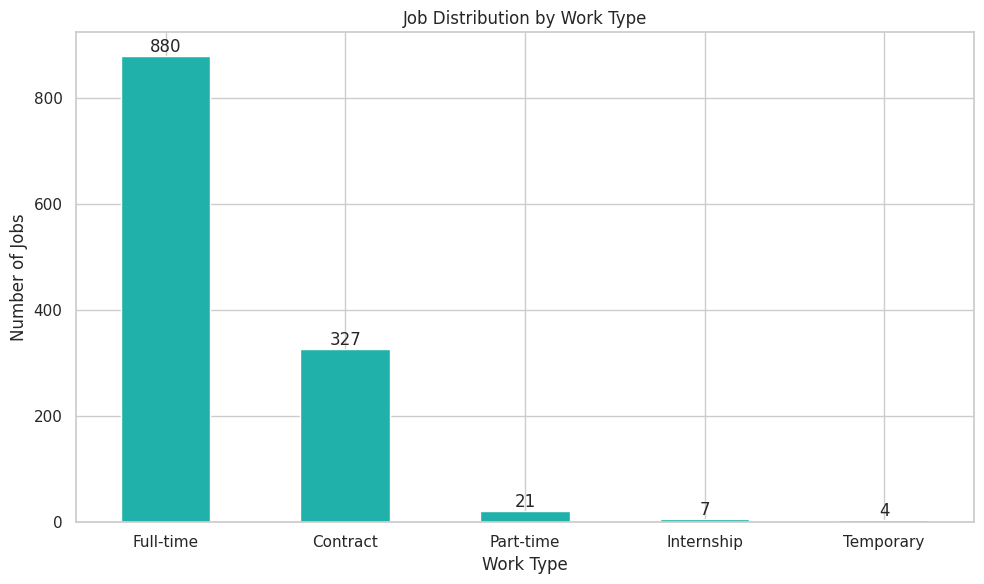

In [ ]:
distribusi_jenis_pekerjaan = data_clean['jenis_pekerjaan'].value_counts()

plt.figure(figsize=(10, 6))
ax = distribusi_jenis_pekerjaan.plot(kind='bar', color='lightseagreen')
plt.title('Job Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0)
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

**Distribusi Jenis Pekerjaan**

Dari visualisasi diatas maka dapat disimpulkan distribusi tiap jenis pekerjaan ialah:


*   Full-time berjumlah 880 pekerjaan
*   Contract berjumlah 327 pekerjaan
*   Part-time berjumlah 21 pekerjaan
*   Internship berjumlah 7 pekerjaan
*   Temporary berjumlah 4 pekerjaan



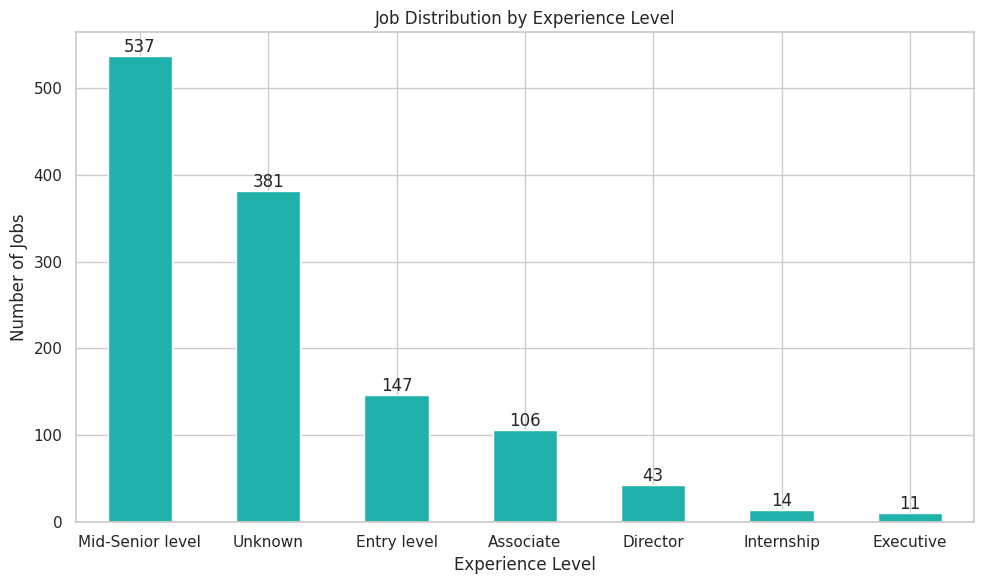

In [ ]:
distribusi_tingkat_pengalaman = data_clean['tingkat_pengalaman_terformat'].value_counts()

plt.figure(figsize=(10, 6))
ax = distribusi_tingkat_pengalaman.plot(kind='bar', color='lightseagreen')
plt.title('Job Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=0)
plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i, label_type='edge')
plt.show()

**Distribusi Tingkat Pengalaman**

Dari visualisasi diatas maka dapat disimpulkan distribusi tiap tingkat pengalaman ialah:


*   Mid-Senior level berjumlah 537 pekerjaan
*   Entry level berjumlah 147 pekerjaan
*   Associate berjumlah 106 pekerjaan
*   Director berjumlah 43 pekerjaan
*   Executive berjumlah 14 pekerjaan
*   Internship berjumlah 11 pekerjaan
*   Unknown berjumlah 381 pekerjaan



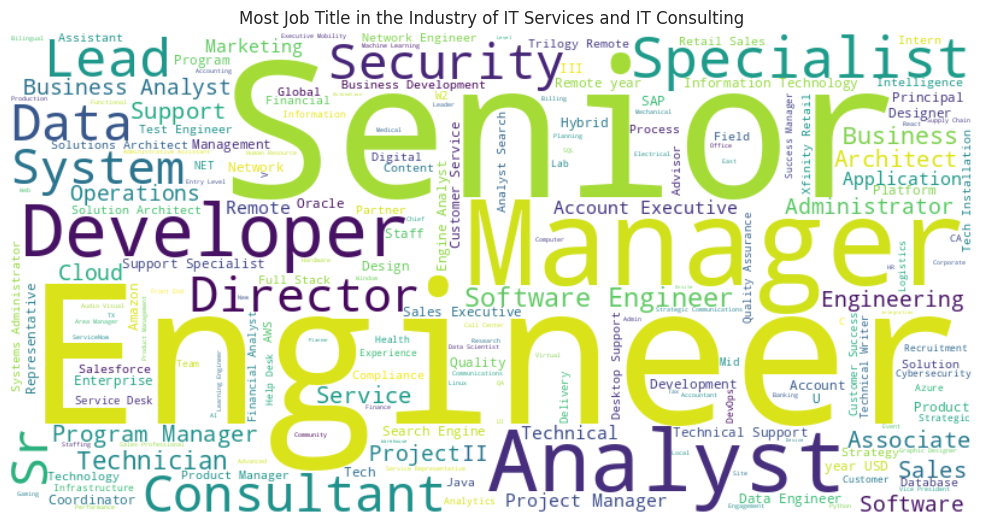

In [ ]:
job_titles_text = ' '.join(data_clean['judul'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(job_titles_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Job Title in the Industry of IT Services and IT Consulting')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
distribusi_pekerjaan = data_clean['judul'].value_counts()
print(distribusi_pekerjaan)

judul
Search Engine Analyst                                          17
Network Engineer                                                8
Tech 1, Installation                                            7
Senior Data Engineer                                            6
Data Analyst                                                    6
                                                               ..
Transport Service Dispatcher L3                                 1
Security Systems Applications Specialist III                    1
ServiceNow CMDB Business Analyst                                1
Event Program Manager                                           1
Senior IT Business Systems Analyst, Supply Chain Management     1
Name: count, Length: 1084, dtype: int64


Analisis kemampuan yang paling menonjol

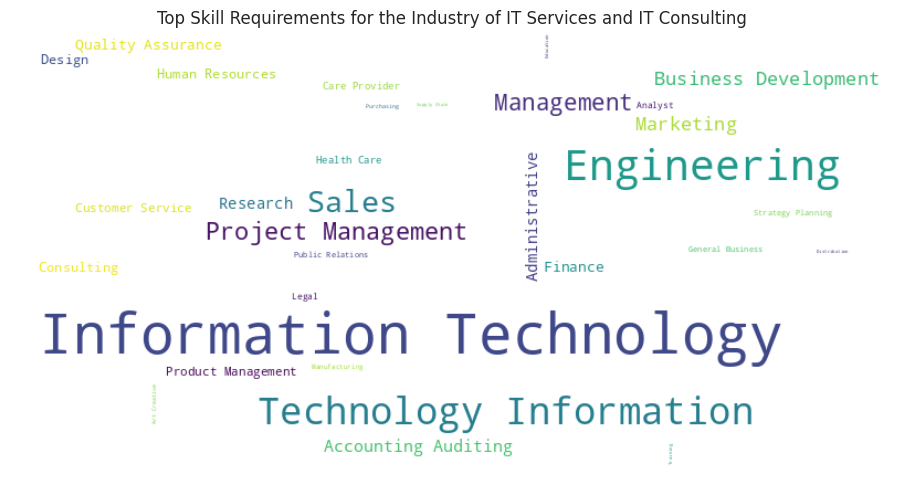

In [ ]:
skill_name_text = ' '.join(data_clean['nama_kemampuan'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(skill_name_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top Skill Requirements for the Industry of IT Services and IT Consulting')
plt.axis('off')
plt.tight_layout()
plt.show()

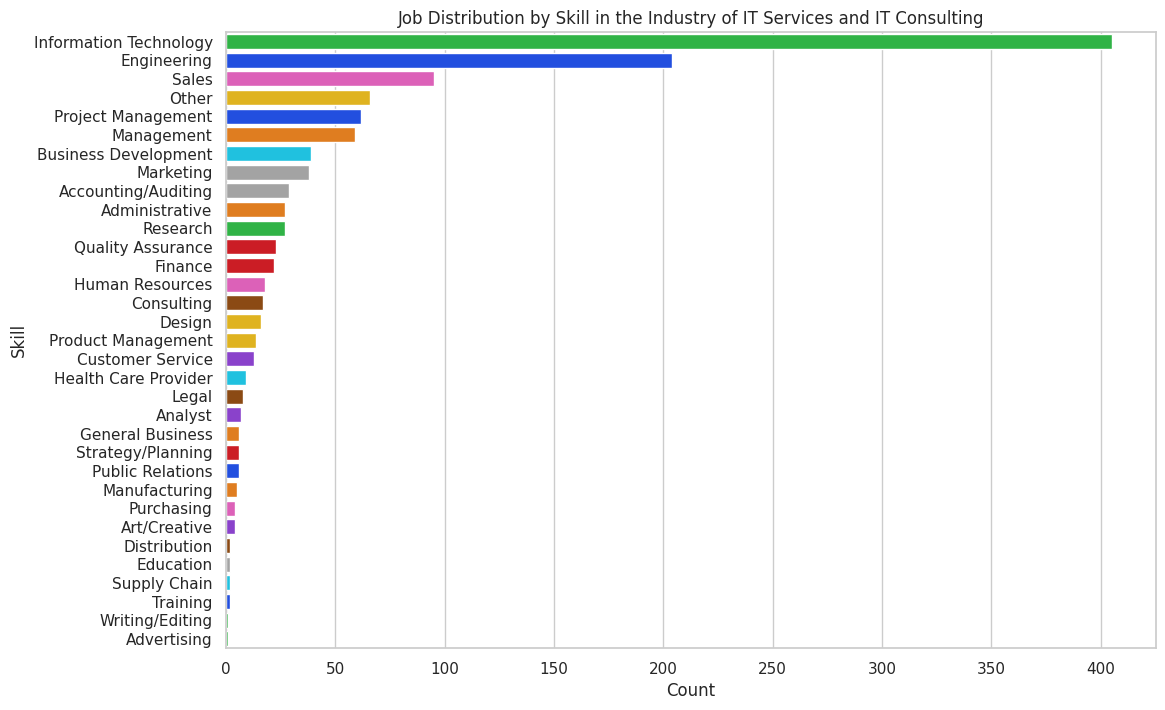

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(y='nama_kemampuan', hue='nama_kemampuan', data=data_clean,
              order=data_clean['nama_kemampuan'].value_counts().index,
              palette='bright', legend=False)
plt.title('Job Distribution by Skill in the Industry of IT Services and IT Consulting')
plt.xlabel('Count')
plt.ylabel('Skill')
plt.show()

In [ ]:
distribusi_skill= data_clean['nama_kemampuan'].value_counts()
print(distribusi_skill)

nama_kemampuan
Information Technology    405
Engineering               204
Sales                      95
Other                      66
Project Management         62
Management                 59
Business Development       39
Marketing                  38
Accounting/Auditing        29
Administrative             27
Research                   27
Quality Assurance          23
Finance                    22
Human Resources            18
Consulting                 17
Design                     16
Product Management         14
Customer Service           13
Health Care Provider        9
Legal                       8
Analyst                     7
General Business            6
Strategy/Planning           6
Public Relations            6
Manufacturing               5
Purchasing                  4
Art/Creative                4
Distribution                2
Education                   2
Supply Chain                2
Training                    2
Writing/Editing             1
Advertising              

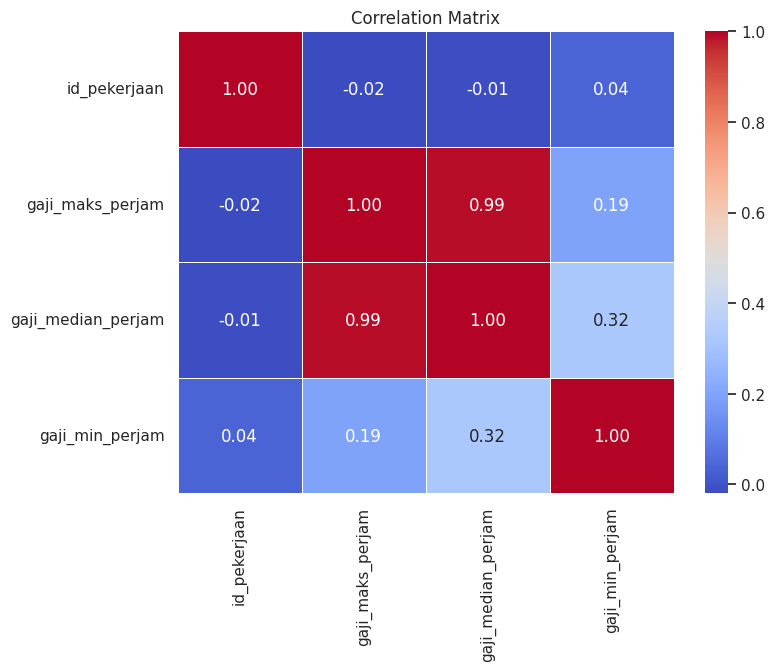

In [ ]:
data_numerik = data_clean.select_dtypes(include=[np.number])

correlation_matrix = data_numerik.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_columns = data_clean.select_dtypes(include='object').columns
data_clean[categorical_columns] = data_clean[categorical_columns].apply(lambda col: le.fit_transform(col.astype(str)))

In [ ]:
data_check = data_clean.drop(columns=['nama_industri'])

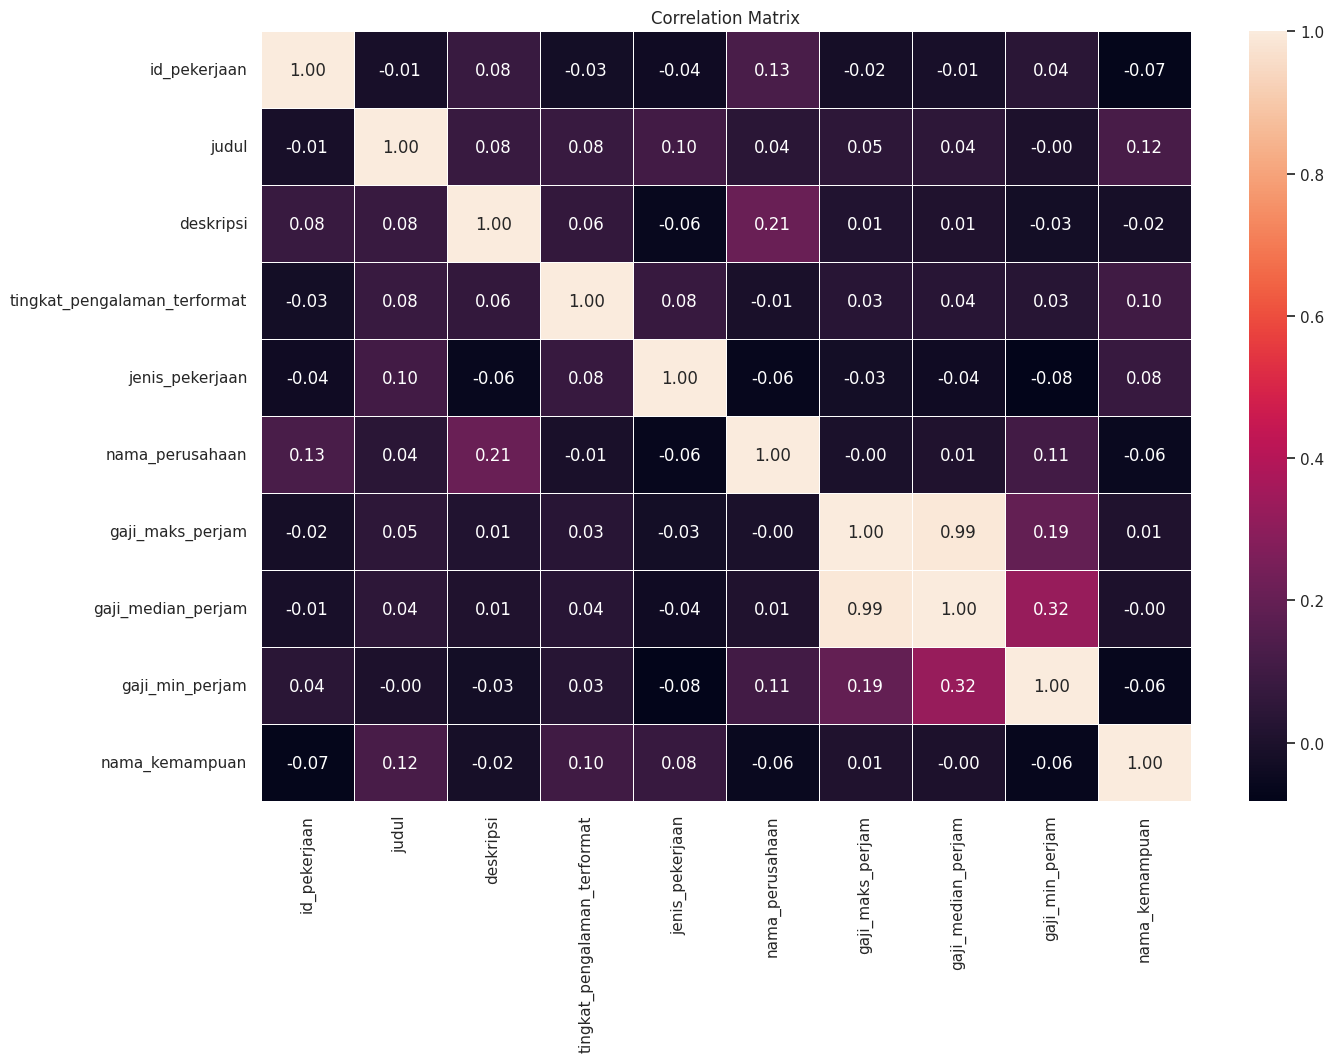

In [ ]:
correlation_matrix = data_check.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Modelling

In [ ]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
data = dfc_final_clean
pd.set_option('display.max_columns', None)
data

,id_pekerjaan,nama_industri,judul,deskripsi,tingkat_pengalaman_terformat,jenis_pekerjaan,nama_perusahaan,gaji_maks_perjam,gaji_median_perjam,gaji_min_perjam,nama_kemampuan
573,3692301162,0,439,774,5,0,311,73.000000,69.000000,65.000000,23
574,3692301171,0,648,513,2,1,360,23.076923,19.951923,16.826923,1
575,3692302089,0,231,692,5,0,272,80.000000,75.000000,70.000000,16
579,3690841406,0,701,1169,5,1,300,52.884615,50.480769,48.076923,16
581,3690860158,0,443,962,6,1,468,36.057692,33.653846,31.250000,16
...,...,...,...,...,...,...,...,...,...,...,...
4540,3749358187,0,816,1031,6,1,204,122.836538,88.100962,53.365385,26
4544,3757743386,0,222,880,5,1,424,66.105769,60.096154,54.086538,16
4545,3756928125,0,748,1176,6,1,100,98.076923,76.538462,55.000000,28
4546,3756108920,0,879,581,6,1,73,63.942308,46.009615,28.076923,16


In [ ]:
# memilih fitur dan target
data1 = data[['nama_industri', 'judul', 'deskripsi', 'tingkat_pengalaman_terformat', 'jenis_pekerjaan', 'nama_perusahaan', 'nama_kemampuan', 'gaji_min_perjam', 'gaji_maks_perjam','gaji_median_perjam',]]
data = data1[['tingkat_pengalaman_terformat', 'jenis_pekerjaan', 'gaji_maks_perjam', 'gaji_median_perjam', 'gaji_min_perjam', 'nama_kemampuan', 'nama_perusahaan', 'judul']]
X1 = data.drop('gaji_maks_perjam', axis=1)
X2 = data.drop('gaji_median_perjam', axis=1)
X3 = data.drop('gaji_median_perjam', axis=1)
X4 = data1.drop('gaji_median_perjam', axis=1)
y1 = data['gaji_maks_perjam']
y2 = data['gaji_median_perjam']
y3 = data['gaji_median_perjam']
y4 = data1['gaji_median_perjam']

### Linear Regression

In [ ]:
# inisialisasi scaler
lr = LinearRegression(copy_X=True,
                      fit_intercept=True,
                      n_jobs=None)
# membuat pipeline
pipeline = make_pipeline(StandardScaler(with_mean=False), lr)

# memisahkan antara data latih dan data test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X3, y3, test_size=0.3, random_state=0)

# Fit the model
pipeline.fit(X_train1, y_train1)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# prediksi target pada dataset test
y_pred1 = pipeline.predict(X_test1)

# skor akurasi di dataset test
accuracy_test1 = r2_score(y_test1,y_pred1)
print('skor akurasi pada dataset test : ', round((accuracy_test1*100),3))

skor akurasi pada dataset test :  100.0


In [ ]:
# Evaluasi model
mae_rl = mean_absolute_error(y_test1, y_pred1)
mse_rl = mean_squared_error(y_test1, y_pred1)
r2_rl = r2_score(y_test1, y_pred1)
rmse_rl = np.sqrt(mse_rl)

print(f"Evaluasi Model (Data Asli) Regresi Linear:")
print(f"Mean Absolute Error (MAE):", round(mae_rl, 3))
print(f"Mean Squared Error (MSE):", round(mse_rl, 3))
print(f"R-squared (R²):", round(r2_rl, 3))
print(f"Root Mean Squared Error (RMSE): ", round(rmse_rl, 3))

Evaluasi Model (Data Asli) Regresi Linear:
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
R-squared (R²): 1.0
Root Mean Squared Error (RMSE):  0.0


#### Regression Plot

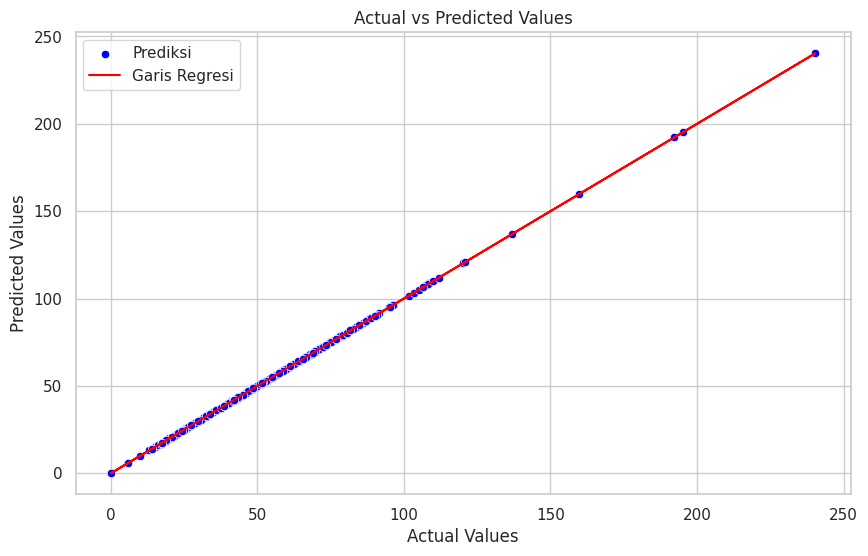

In [ ]:
# membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test1, y=y_pred1, color='blue', label='Prediksi')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# garis plot warna merah
plt.plot(y_test1, y_test1, color='red', label='Garis Regresi')

plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:
# Data evaluasi
evaluasi_data = {
    'Metric': ['MAE', 'MSE', 'R²', 'RMSE'],
    'Value': [mae_rl, mse_rl, r2_rl, rmse_rl]
}

# Membuat DataFrame dari data evaluasi
evaluasi_df = pd.DataFrame(evaluasi_data)

<ipython-input-1647-0fdf89fdbddc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Metric', y='Value', data=evaluasi_df, palette='viridis')


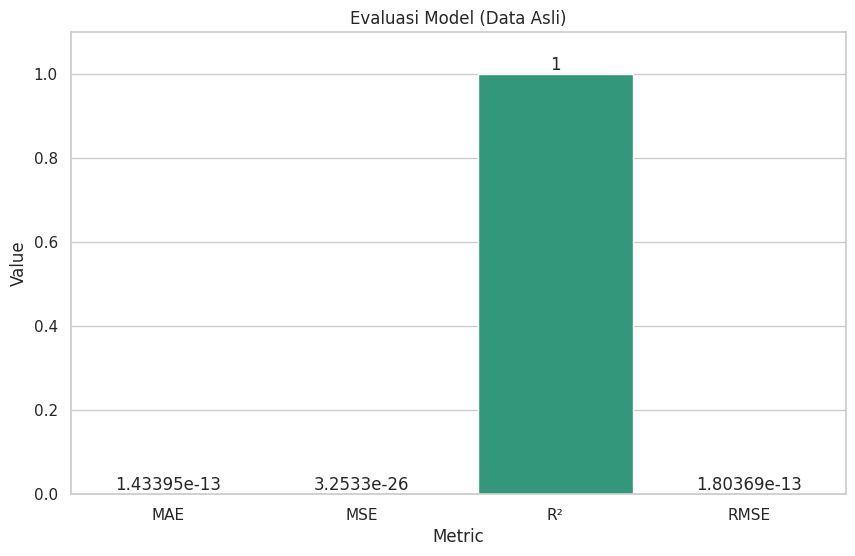

In [ ]:
# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat bar plot untuk visualisasi evaluasi model
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Metric', y='Value', data=evaluasi_df, palette='viridis')

plt.title('Evaluasi Model (Data Asli)')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.ylim(0, max(evaluasi_df['Value']) * 1.1)  # Untuk sedikit ruang di atas bar tertinggi

# Menampilkan nilai pada setiap bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Polynomial Regression

In [ ]:
# Praproses data (OneHotEncoding untuk variabel kategorikal dengan handle_unknown='ignore')
categorical_features = ['judul', 'deskripsi', 'tingkat_pengalaman_terformat', 'jenis_pekerjaan', 'nama_perusahaan', 'nama_kemampuan', 'nama_industri']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
# memisahkan antara data latih dan data test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [ ]:
# Membuat pipeline dengan PolynomialFeatures dan LinearRegression
degree = 2
model = Pipeline([
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=degree)),
    #('scaler', MaxAbsScaler()),
    ('scaler', StandardScaler(with_mean=False)),  # Memastikan StandardScaler tidak mengurangi mean untuk data sparse
    ('regressor', LinearRegression())
])

In [ ]:
# Melatih model
model.fit(X_train2, y_train2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['judul', 'deskripsi',
                                                   'tingkat_pengalaman_terformat',
                                                   'jenis_pekerjaan',
                                                   'nama_perusahaan',
                                                   'nama_kemampuan',
                                                   'nama_industri'])])),
                ('poly', PolynomialFeatures()),
                ('scaler', StandardScaler(with_mean=False)),
                ('regressor', LinearRegression())])

In [ ]:
# Memprediksi dengan model
y_pred2 = model.predict(X_test2)

# skor akurasi di dataset test
accuracy_test2 = r2_score(y_test2,y_pred2)
print('skor akurasi pada dataset test : ', round((accuracy_test2*100),3))

skor akurasi pada dataset test :  37.396


In [ ]:
# Evaluasi model
mae_poly = mean_absolute_error(y_test2, y_pred2)
mse_poly = mean_squared_error(y_test2, y_pred2)
r2_poly = r2_score(y_test2, y_pred2)
rmse_poly = np.sqrt(mse_rl)

print(f"Evaluasi Model (Data Asli) Regresi Linear:")
print(f"Mean Absolute Error (MAE):", round(mae_poly, 3))
print(f"Mean Squared Error (MSE):", round(mse_poly, 3))
print(f"R-squared (R²):", round(r2_poly, 3))
print(f"Root Mean Squared Error (RMSE): ", round(rmse_poly, 3))

Evaluasi Model (Data Asli) Regresi Linear:
Mean Absolute Error (MAE): 16.557
Mean Squared Error (MSE): 458.224
R-squared (R²): 0.374
Root Mean Squared Error (RMSE):  0.0


#### Regression Plot

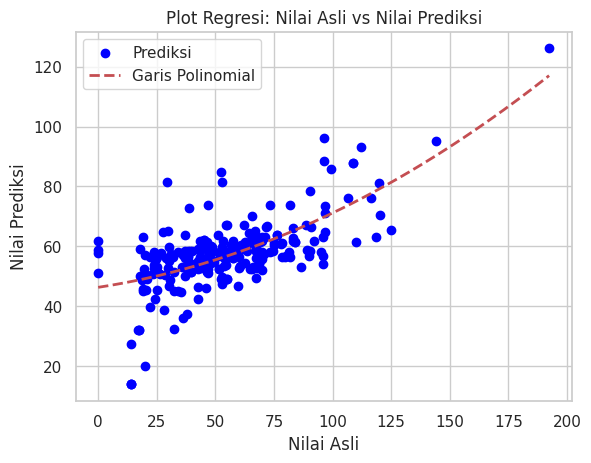

In [ ]:
# Fit data asli dan prediksi dengan model regresi polinomial
poly = PolynomialFeatures(degree=2)
y_test2_poly = poly.fit_transform(np.array(y_test2).reshape(-1, 1))
model = LinearRegression().fit(y_test2_poly, y_pred2)

# Membuat array x dari nilai minimum sampai nilai maksimum y_test2
X_visual = np.linspace(y_test2.min(), y_test2.max(), 400).reshape(-1, 1)

# Membuat array y dengan model regresi polinomial
y_visual = model.predict(poly.transform(X_visual))

# Plot data asli vs prediksi
plt.scatter(y_test2, y_pred2, color='blue', label='Prediksi')
plt.plot(X_visual, y_visual, 'r--', lw=2, label='Garis Polinomial')
plt.xlabel('Nilai Asli')
plt.ylabel('Nilai Prediksi')
plt.title('Plot Regresi: Nilai Asli vs Nilai Prediksi')
plt.legend()
plt.show()

In [ ]:
# Data evaluasi
evaluasi_data_poly = {
    'Metric': ['MAE', 'MSE', 'R²', 'RMSE'],
    'Value': [mae_poly, mse_poly, r2_poly, rmse_poly]
}

# Membuat DataFrame dari data evaluasi
evaluasi_df_poly = pd.DataFrame(evaluasi_data_poly)

<ipython-input-1527-bf655890b1d4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ar = sns.barplot(x='Metric', y='Value', data=evaluasi_data_poly, palette='viridis')


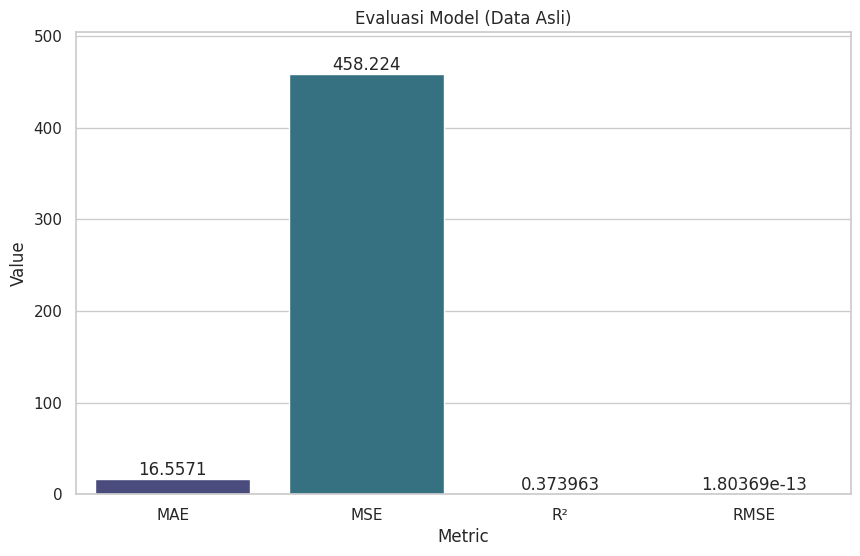

In [ ]:
# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat bar plot untuk visualisasi evaluasi model
plt.figure(figsize=(10, 6))
ar = sns.barplot(x='Metric', y='Value', data=evaluasi_data_poly, palette='viridis')

plt.title('Evaluasi Model (Data Asli)')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.ylim(0, max(evaluasi_df_poly['Value']) * 1.1)  # Untuk sedikit ruang di atas bar tertinggi

# Menampilkan nilai pada setiap bar
for container in ar.containers:
    ar.bar_label(container)

plt.show()